In [104]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] #解决seaborn中文字体显示问题，中文字体-黑体
plt.rc('figure', figsize=(6, 6))  #把plt默认的图片size调大一点
plt.rcParams['figure.dpi'] = 500 #分辨率调高一点
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1.5)  # 解决Seaborn中文显示问题并调整字体大小
#plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

## 1.导入数据

In [159]:
data_wx = pd.read_csv("外语培训.csv")
data_jlc = pd.read_csv("jobleadchina.csv")

In [160]:
data_wx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 7 columns):
title          976 non-null object
link           976 non-null object
salary         976 non-null object
company        976 non-null object
area           976 non-null object
update_time    976 non-null object
exp_title      976 non-null object
dtypes: object(7)
memory usage: 53.5+ KB


In [161]:
data_jlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
title          960 non-null object
link           960 non-null object
salary         960 non-null object
company        960 non-null object
area           960 non-null object
update_time    960 non-null object
exp_title      960 non-null object
education      960 non-null object
com_type       960 non-null object
dtypes: object(9)
memory usage: 67.6+ KB


## 2.数据清洗
### 2.1万行教师数据清洗
* 清洗出省份、城市
* 经验、、学历
* 工资

### 2.1.1清洗出省份、城市

In [162]:
data_wx['area'].sample(10)

480    江苏-苏州-昆山市
440    云南-昆明-安宁市
707    浙江-杭州-富阳区
272       上海-普陀区
364       上海-闵行区
584        广东-深圳
104        安徽-合肥
173           上海
134    广东-深圳-龙岗区
459        湖北-武汉
Name: area, dtype: object

In [163]:
data_wx['area'].str.split("-",expand=True)

,0,1,2
0,广东,广州,None
1,广东,广州,None
2,江苏,苏州,太仓市
3,广东,佛山,顺德区
4,广东,东莞,None
5,广东,佛山,南海区
6,广东,佛山,顺德区
7,广东,广州,越秀区
8,广东,东莞,None
9,广东,惠州,惠阳区


* 把分割后的省份、城市字段取出来，加入到原数据数据框
* 把直辖市北京等的【城市】改为自己的名字

In [164]:
data_wx['province'] = data_wx['area'].str.split("-",expand=True)[0]
data_wx['city'] = data_wx['area'].str.split("-",expand=True)[1]

data_wx.loc[data_wx['province']=='北京', 'city'] = '北京'
data_wx.loc[data_wx['province']=='上海', 'city'] = '上海'
data_wx.loc[data_wx['province']=='天津', 'city'] = '天津'
data_wx.loc[data_wx['province']=='重庆', 'city'] = '重庆'

### 2.1.2洗出经验、学历

In [165]:
data_wx['exp_title'].sample(5)

917          不限/大专
119        不限/大专以上
318      不限/大学本科以上
367    一年以上/大学本科以上
445     应届毕业生/大专以上
Name: exp_title, dtype: object

In [166]:
data_wx['exp'] = data_wx['exp_title'].str.split("/",expand=True)[0]
data_wx['degree'] = data_wx['exp_title'].str.split("/",expand=True)[1]

In [167]:
data_wx['exp'].unique()

array(['不限', '两年以上', '一年以上', '三年以上', '应届毕业生', '五年以上', '四年以上'],
      dtype=object)

* 用map()方法把【exp】经验字段标准化

In [168]:
exp_map = {'不限':'经验不限', '应届毕业生':'应届毕业生', '一年以上':'一到三年', '两年以上':'一到三年', '三年以上':'三到五年', '四年以上':'三到五年', '五年以上':'五到十年'}
data_wx['exp'] = data_wx['exp'].map(exp_map)

In [169]:
data_wx['exp'].unique()

array(['经验不限', '一到三年', '三到五年', '应届毕业生', '五到十年'], dtype=object)

* 然后是学历

In [170]:
data_wx['degree'].unique()

array(['不限', '大学本科以上', '大专以上', '大学本科', '大专', '硕士', '硕士以上', '不限以上', '中专以上',
       '高中以上', '中专'], dtype=object)

In [171]:
degree_map = {'不限':'学历不限', '不限以上':'学历不限','中专以上':'中专/高中','高中以上':'中专/高中', '中专':'中专/高中', '大专以上':'大专','大专':'大专', '大学本科以上':'本科',  '大学本科':'本科',  '硕士':'硕士', '硕士以上':'硕士'}
data_wx['degree'] = data_wx['degree'].map(degree_map)

In [172]:
data_wx['degree'].unique()

array(['学历不限', '本科', '大专', '硕士', '中专/高中'], dtype=object)

In [173]:
data_wx.sample(5)

,title,link,salary,company,area,update_time,exp_title,province,city,exp,degree
342,外教英语老师,/jobs_view_454014.html,5K-10K/月,重庆百乐语言培训学校,重庆,2019/08/07,一年以上/大学本科以上,重庆,重庆,一到三年,本科
683,诚聘少儿英语老师,/jobs_view_472054.html,8K-10K/月,北京三英卓越教育科技有限责任公司,北京-海淀区,2019/07/30,不限/大学本科以上,北京,北京,经验不限,本科
577,英语教师,/jobs_view_436596.html,5K-8K/月,广州常景禄教育科技有限公司,广东-广州,2019/08/05,不限/大学本科以上,广东,广州,经验不限,本科
239,少儿英语老师（高薪诚聘）,/jobs_view_450581.html,8K-12K/月,上海玺鸣数字科技有限公司,上海-浦东新区,2019/08/11,一年以上/大学本科以上,上海,上海,一到三年,本科
506,青少年英语老师,/jobs_view_448261.html,5K-8K/月,东莞市清溪斯坦普英语培训中心,广东-东莞,2019/08/05,不限/大专以上,广东,东莞,经验不限,大专


### 2.1.3清洗出工资

In [174]:
data_wx['salary'].unique()

array(['面议', '6K-8K/月', '5K-10K/月', '8K-12K/月', '5K-8K/月', '6K-12K/月',
       '4K-8K/月', '4.5K-9K/月', '9W-18W/年', '4K-7K/月', '10K-15K/月',
       '5W-10W/年', '2K-4K/月', '6K-10K/月', '3K-8K/月', '2K-2.5K/月',
       '8K-15K/月', '4K-6K/月', '7K-10K/月', '10K-13K/月', '8K-10K/月',
       '9K-15K/月', '9K-18K/月', '4.5K-6K/月', '7W-10W/年', '4.5K-7K/月',
       '3K-6K/月', '2.5K-5K/月', '3.5K-6.5K/月', '11K-13K/月', '6W-8W/年',
       '8W-16W/年', '6W-10W/年', '8W-15W/年', '6K-9K/月', '4.5K-8K/月',
       '8K-16K/月', '3K-5K/月', '15W-30W/年', '3K-4K/月', '10K-20K/月',
       '5K-7K/月', '2.5K-4K/月', '8K-13K/月', '8W-10W/年', '8.33K-10K/月',
       '3.5K-6K/月', '6K-11K/月', '5K-9K/月', '7K-14K/月', '10W-20W/年',
       '2K-3.5K/月', '2.6K-5K/月', '12W-20W/年', '15K-20K/月', '9.6W-12.6W/年',
       '6K-7K/月', '10W-15W/年', '10K-14K/月', '11W-15W/年', '2K-3K/月',
       '9K-10K/月', '1.2K-2K/月', '7K-12K/月', '7K-13K/月', '3K-4.5K/月',
       '12K-17K/月', '8.5K-15K/月', '2.5K-3.5K/月', '10K-16K/月', '12K-22K/月',
       '5K-6.5K/月', '7K-8K/月', 

* 格式只有3种，还算干净
* 取给出工资范围上下限的平均数
* 并标准化到以（/元）为单位

In [175]:
def get_salary(data):
    pat_K = r"(.*)K-(.*)K"
    pat_W = r"(.*)W-(.*)W"
    if '面议' in data:
        return np.nan
    if 'K' in data :
        low,high = re.findall(pattern=pat_K, string=data)[0]
        return (float(low)+float(high))/2
    if 'W' in data:
        low,high = re.findall(pattern=pat_W, string=data)[0]
        return float(low)+float(high)/2*10/12
    
data_wx['salary_clean'] = (data_wx['salary'].apply(get_salary)*1000).round(2)

In [176]:
data_wx['salary_clean'].sample(5)

910    7500.0
638    6000.0
330    7500.0
685    6500.0
461    6000.0
Name: salary_clean, dtype: float64

In [177]:
data_wx.sample(5)

,title,link,salary,company,area,update_time,exp_title,province,city,exp,degree,salary_clean
391,少儿英语教师（合肥市区）,/jobs_view_451230.html,4K-8K/月,合肥东方金子塔培训学校,安徽-合肥-庐阳区,2019/08/07,不限/大学本科,安徽,合肥,经验不限,本科,6000.0
847,少儿英语老师,/jobs_view_434793.html,8K-10K/月,深圳市通达教育科技有限公司,广东-深圳,2019/06/18,一年以上/大学本科以上,广东,深圳,一到三年,本科,9000.0
783,少儿英语老师,/jobs_view_408778.html,2.5K-5K/月,汤姆之家少儿英语,河北-邢台-新河县,2019/07/03,一年以上/大专以上,河北,邢台,一到三年,大专,3750.0
788,少儿英语老师,/jobs_view_413073.html,3K-6K/月,武汉金海星教育科技有限公司武昌分公司,湖北-武汉-武昌区,2019/07/01,两年以上/大学本科以上,湖北,武汉,一到三年,本科,4500.0
565,急聘少儿英语老师,/jobs_view_438874.html,7K-13K/月,无锡瑞思外语培训有限公司,江苏-无锡-梁溪区,2019/08/05,不限/大学本科以上,江苏,无锡,经验不限,本科,10000.0


### 2.2JobLeadChina 数据清洗
* 清洗出“exp_title”
* 清洗出“salary”

In [178]:
data_jlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
title          960 non-null object
link           960 non-null object
salary         960 non-null object
company        960 non-null object
area           960 non-null object
update_time    960 non-null object
exp_title      960 non-null object
education      960 non-null object
com_type       960 non-null object
dtypes: object(9)
memory usage: 67.6+ KB


In [179]:
data_jlc.sample()

,title,link,salary,company,area,update_time,exp_title,education,com_type
509,Beijing International Kindergarten / Preschool...,http://www.jobleadchina.com/job/2229,16K/MTH - 25K/MTH,LCAIS,Beijing,"Post time: July 05, 2018",Experience: Entry Level,Bachelor,School


### 2.2.1清洗出经验exp_title

In [180]:
data_jlc['exp_title'].unique()

array(['Experience: Executive', 'Experience: Entry Level',
       'Experience: Internship', 'Experience: Mid-Senior Level',
       'Experience: Associate', 'Experience: Director'], dtype=object)

In [181]:
data_jlc['exp'] = data_jlc['exp_title'].str.split(": ", expand=True)[1]

In [182]:
data_jlc['exp'].unique()

array(['Executive', 'Entry Level', 'Internship', 'Mid-Senior Level',
       'Associate', 'Director'], dtype=object)

* 这个经验这里的六个单词翻译过来有点小问题，问题就是我不是特别确定
* Associate：助理，算实习？
* Internship：实习，就是实习
* Entry Level：入门级，应届毕业生？
* Mid-Senior Level：中高级，1-3年ok？
* Executive：执行，那就3-5年
* Director：主任，5-10年可以嘛


### 2.2.2清洗出salary

In [183]:
data_jlc['salary'].unique()

array(['15K/MTH - 30K/MTH', '2K/MTH - 4K/MTH', '15K/MTH - 25K/MTH',
       '10000K/MTH - 25000K/MTH', '20K/MTH - 25K/MTH', '8K/MTH - 18K/MTH',
       '13K/MTH - 16K/MTH', '13K/MTH - 25K/MTH', '13K/MTH - 28K/MTH',
       '18K/MTH - 30K/MTH', '12K/MTH - 30K/MTH', '13K/MTH - 18K/MTH',
       '16K/MTH - 20K/MTH', '20K/MTH - 40K/MTH', '10K/MTH - 25K/MTH',
       '12K/MTH - 25K/MTH', '20K/MTH - 30K/MTH', '16K/MTH - 17K/MTH',
       '18K/MTH - 25K/MTH', '10K/MTH - 20K/MTH',
       '16000K/MTH - 17000K/MTH', '18K/MTH - 21K/MTH',
       '15000K/MTH - 18000K/MTH', '25K/MTH - 27K/MTH', '8K/MTH - 25K/MTH',
       '16K/MTH - 18K/MTH', '18K/MTH - 22K/MTH', '8K/MTH - 20K/MTH',
       '14K/MTH - 18K/MTH', '14K/MTH - 17K/MTH', '16K/MTH - 19K/MTH',
       '12K/MTH - 13K/MTH', '15K/MTH - 17K/MTH', '8K/MTH - 15K/MTH',
       '12K/MTH - 22K/MTH', '16K/MTH - 25K/MTH', '25K/MTH - 40K/MTH',
       '16K/MTH - 21K/MTH', '20000K/MTH - 26000K/MTH',
       '16K/MTH - 22K/MTH', '7K/MTH - 10K/MTH', '12000K/MTH - 250

* 虽然人家外国人不用k表示【千】，写一个5k也算咱们的通用写法
* 可是这大量写了4-5位数还加个【k】的是什么心态？

In [184]:
def get_salary_jlc(data):
    pat_jlc = r"(.*)K/MTH - (.*)K/MTH"
    if '00' in data:
        low, high = re.findall(pattern=pat_jlc, string=data)[0]
        return (float(low)+float(high))/2
    else:
        low,high = re.findall(pattern=pat_jlc, string=data)[0]
        return (float(low)+float(high))/2*1000
    
data_jlc['salary_clean'] = data_jlc['salary'].apply(get_salary_jlc).round(2)

In [189]:
data_jlc.groupby('exp')['salary_clean'].mean().round(2)

exp
Director            22107.14
Entry Level         16278.36
Executive           18201.45
Internship          16026.42
Mid-Senior Level    16000.00
Name: salary_clean, dtype: float64

####  我们根据这个薪资再排一下
* Associate：助理，也算实习，对标到经验不限
* Internship：实习，就是实习，对标到经验不限
* Entry Level：入门级，应届毕业生
* Mid-Senior Level：中高级，1-3年
* Executive：执行，3-5年
* Director：主任，5-10年可以的

所以把这两个合并一下就好了

In [190]:
data_jlc.loc[data_jlc['exp']=='Associate', 'exp'] = 'Internship'

In [191]:
data_jlc.sample(5)

,title,link,salary,company,area,update_time,exp_title,education,com_type,exp,salary_clean
952,"Online English teacher for kids, SOHO-WORK",http://www.jobleadchina.com/job/649,3K/MTH - 12K/MTH,WEBi ENGLISH,Shanghai,"Post time: May 10, 2017",Experience: Entry Level,Bachelor,Teaching Center,Entry Level,7500.0
848,Part-time English Teacher Online,http://www.jobleadchina.com/job/1069,10K/MTH - 15K/MTH,First Future,Beijing,"Post time: August 21, 2017",Experience: Entry Level,Bachelor,Teaching Center,Entry Level,12500.0
840,10k-18k for European teachers,http://www.jobleadchina.com/job/1109,10K/MTH - 18K/MTH,Elantu,Beijing,"Post time: August 29, 2017",Experience: Entry Level,Any education,Teaching Center,Entry Level,14000.0
0,Looking for ESL Teachers,http://www.jobleadchina.com/job/4378,15K/MTH - 30K/MTH,Foreign Teachers of English,Guangzhou,"Post time: August 13, 2019",Experience: Executive,Any education,School,Executive,22500.0
667,Kindergarten's Teacher Wanted In Shanghai,http://www.jobleadchina.com/job/1660,14K/MTH - 18K/MTH,Andy,Shanghai,"Post time: February 25, 2018",Experience: Entry Level,Bachelor,Teaching Center,Entry Level,16000.0


* 没问题我们就保存一下

In [192]:
data_wx.to_csv("data_wx.csv", index=False, encoding='utf-8-sig')
data_jlc.to_csv("data_jlc.csv", index=False, encoding='utf-8-sig')

## 3.数据分析
提出问题：

1. 外教的中国老师的工资差的别如何？
2. 市场对外教的经验和学历需求如何？
3. 哪些城市对外教的需求多？
4. 哪些类型的机构在招聘外教？

### 3.1外教的中国老师的工资差的别如何？
* 中教的工资集中分布在五千到一万多一点，外教的工资分布在一万出头到两万出头

In [193]:
data_wx['teacher_type']= '中教'
data_jlc['teacher_type'] = '外教'
data_salary = pd.concat([data_wx[['salary_clean', 'teacher_type']],
                        data_jlc[['salary_clean', 'teacher_type']]])
data_salary.rename(columns={'salary_clean':'工资', 'teacher_type':'教师类型'}, inplace=True)

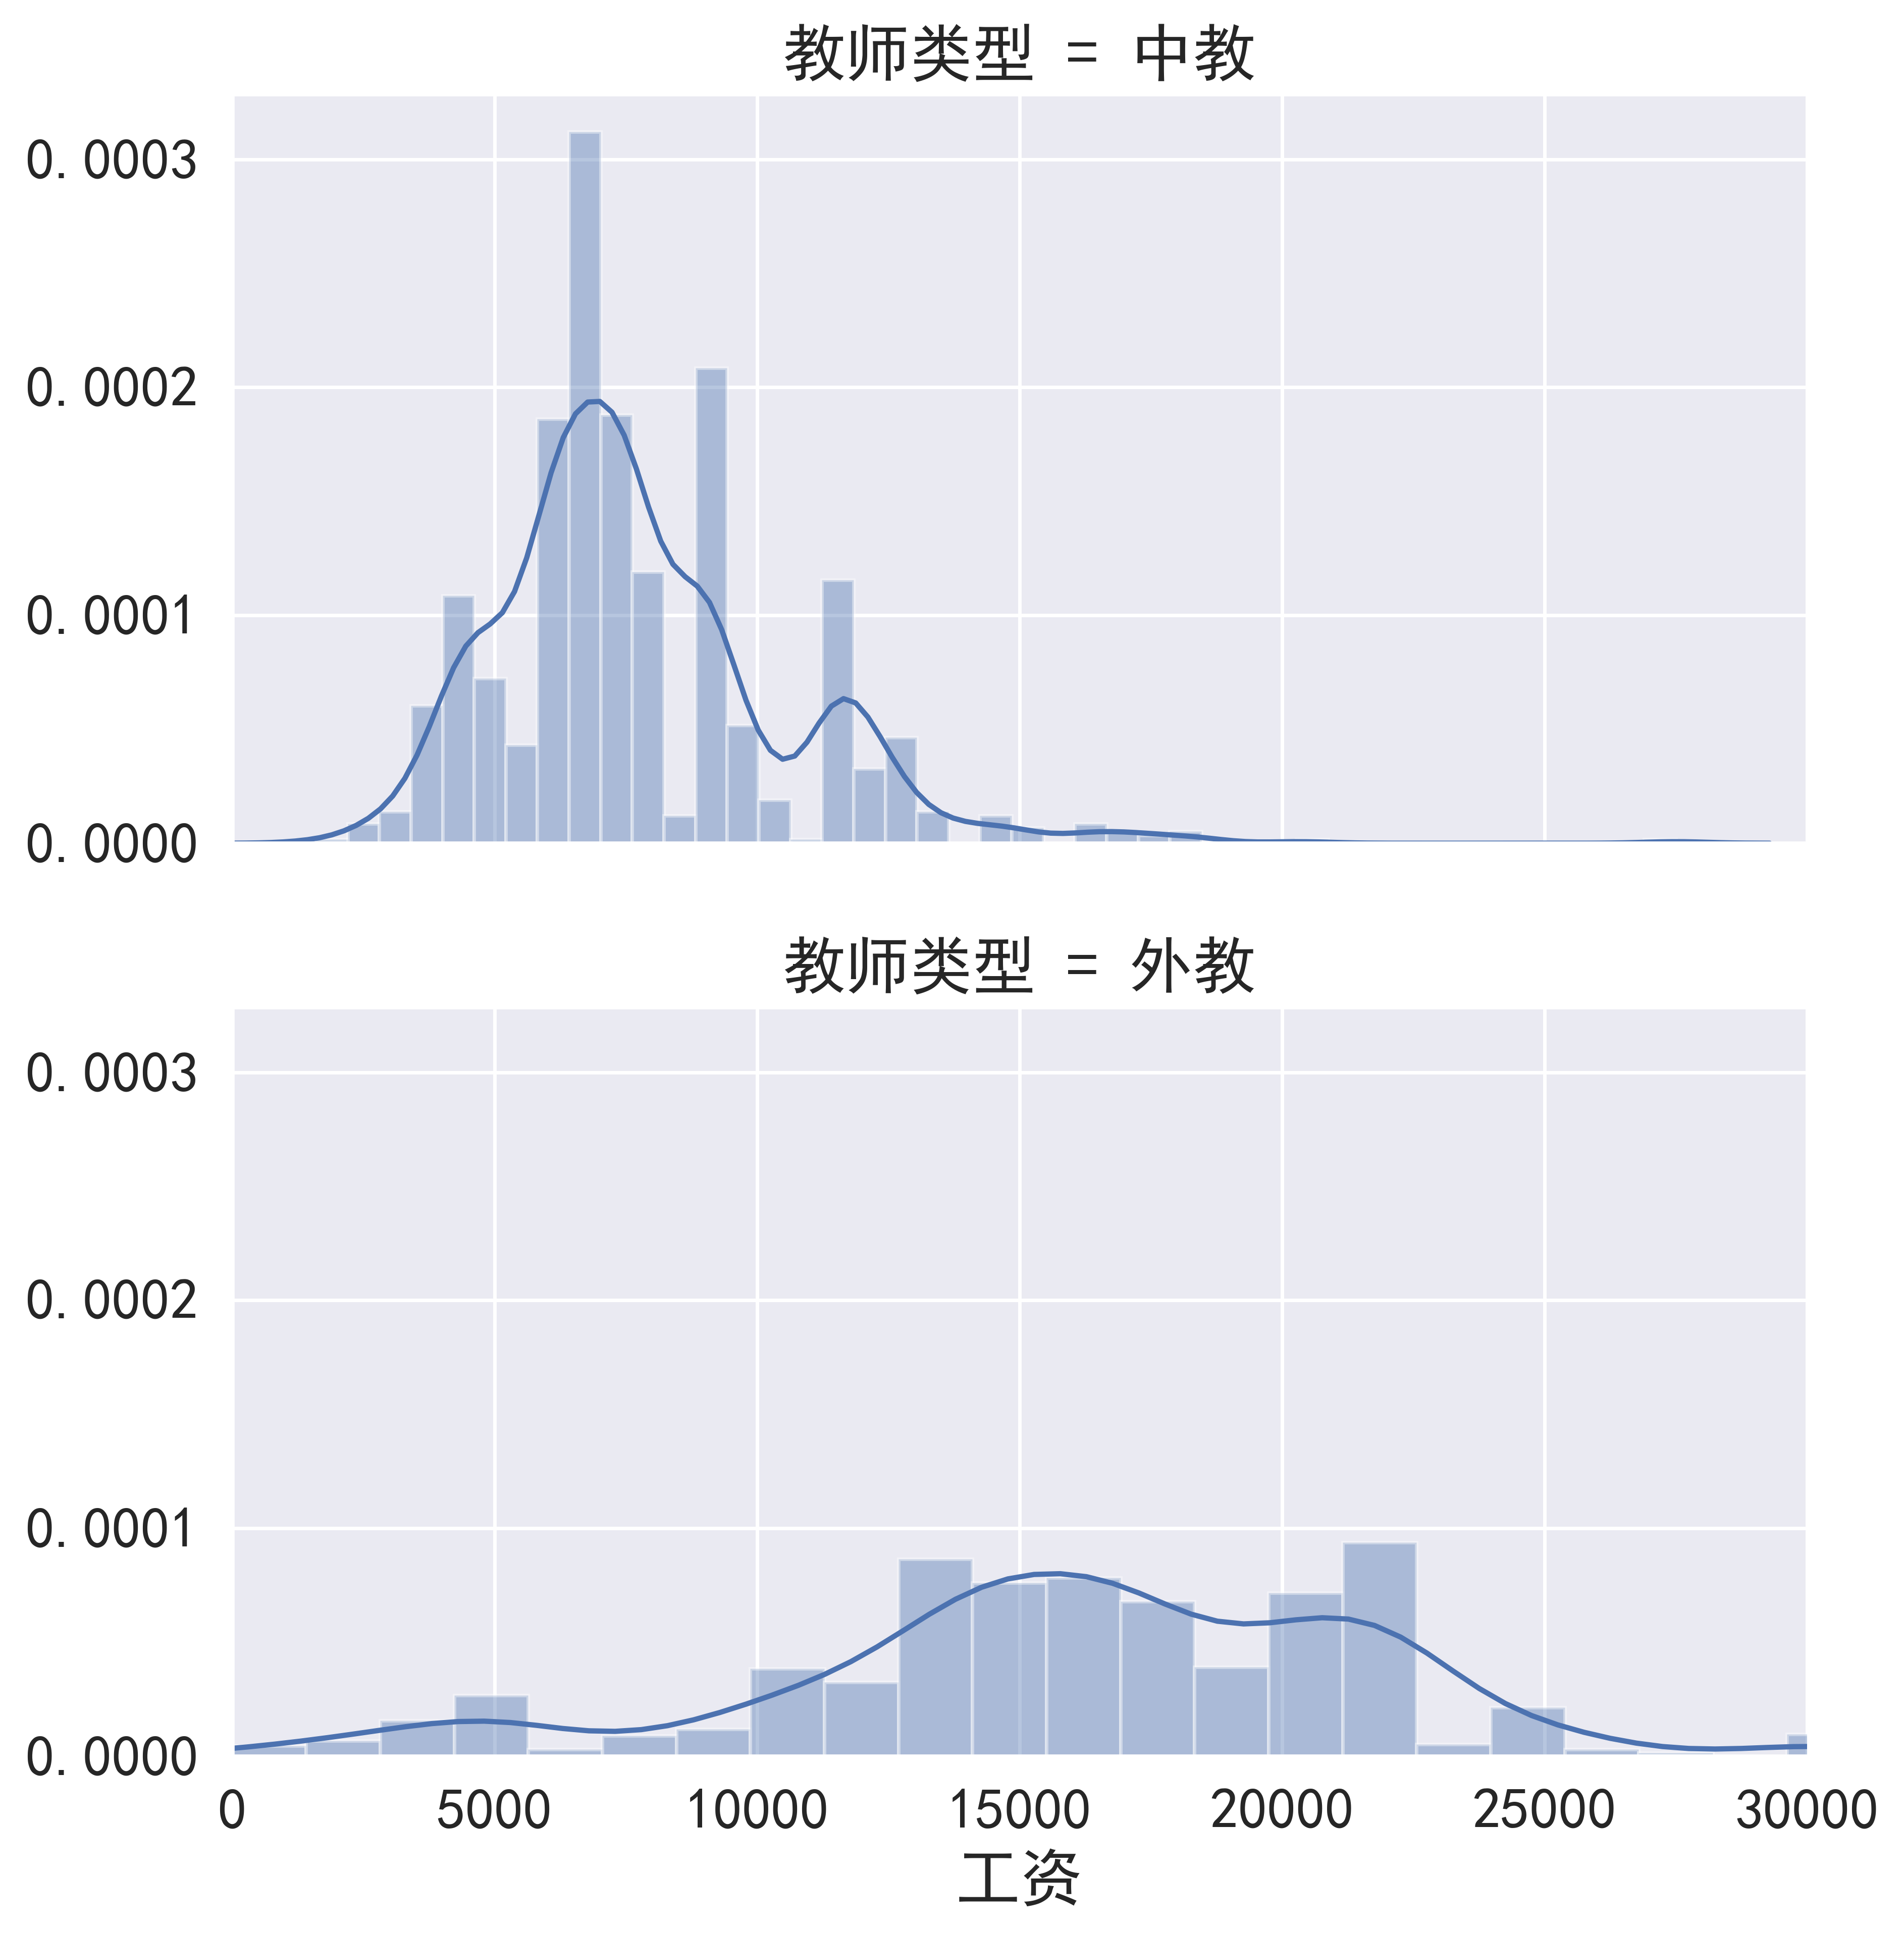

In [196]:
sns.set(font='SimHei',font_scale=1.5)  # 画不同的图要设置不同的字体大小
g = sns.FacetGrid(data_salary, row="教师类型", height=4, aspect=2, xlim=(0,30000))
g.map(sns.distplot, "工资", rug=False)

* 外教的工资均值为16348.3元，中教的工资均值为7777.7元

In [197]:
np.round(data_jlc['salary_clean'].mean(), 1)

16348.3

In [198]:
np.round(data_wx['salary_clean'].mean(), 1)

7777.7

### 3.1.1通过城市对比
* 外教所有城市的平均工资为16782.98元，中教所有城市的平均工资为6772.97元

In [199]:
data_jlc.groupby('area')['salary_clean'].mean().mean().round(2)

16782.98

In [200]:
data_wx.groupby('city')['salary_clean'].mean().mean().round(2)

6772.97

* 外教工资最低的十个城市的平均工资是13500-15800，其中有沈阳、昆明、重庆、武汉、西安等中型城市
* 中教工资最低的十个城市的平均工资是2500-5250，其中有岳阳、绥化、沈阳、清远，大多是市级小城市

In [201]:
np.round(data_jlc.groupby('area')['salary_clean'].mean().sort_values()[:10], 1)

area
Haikou       13500.0
Nanjing      13529.4
Shenyang     13666.7
Others       13766.5
Kunming      13800.0
Chongqing    15200.0
Wuhan        15211.5
Xi'an        15500.0
Hangzhou     15781.5
Ningbo       15800.0
Name: salary_clean, dtype: float64

In [202]:
np.round(data_wx.groupby('city')['salary_clean'].mean().sort_values()[:10], 1)

city
岳阳     2500.0
绥化     2750.0
邢台     3750.0
常德     4500.0
清远     4500.0
郴州     4500.0
阜阳     5000.0
太原     5000.0
连云港    5000.0
沈阳     5250.0
Name: salary_clean, dtype: float64

* 外教工资最高的十个城市的平均工资是15800-35000，其中有天津、广州、上海、北京、成都、深圳等，多半是中国最大型的城市，其中香港以35000元的平均工资位居第一
* 中教工资最高的十个城市的平均工资是8500-10500，也看到了北京、上海、深圳的身影，但是郑州、中山、丽水、南昌等中级城市占了一半多。

In [203]:
np.round(data_jlc.groupby('area')['salary_clean'].mean().sort_values()[-10:], 1)

area
Ningbo       15800.0
Tianjin      16187.5
Guangzhou    16256.8
Shanghai     16863.1
Qingdao      17366.7
Beijing      17372.5
Chengdu      17602.3
Shenzhen     17638.9
Dalian       18833.3
Hongkong     35000.0
Name: salary_clean, dtype: float64

In [204]:
np.round(data_wx.groupby('city')['salary_clean'].mean().sort_values()[-10:], 1)

city
郑州     8500.0
中山     8833.3
上海     8879.2
深圳     8942.7
丽水     9000.0
南昌     9000.0
北京     9663.8
汕头     9750.0
揭阳    10166.7
廊坊    10500.0
Name: salary_clean, dtype: float64

### 3.1.2通过经验进行对比
* 相似的经验水平下，外教的平均工资大概是中教的2.1倍左右

In [120]:
data_jlc['exp'].unique()

array(['Executive', 'Entry Level', 'Internship', 'Mid-Senior Level',
       'Director'], dtype=object)

In [121]:
data_wx['exp'].unique()

array(['经验不限', '一到三年', '三到五年', '应届毕业生', '五到十年'], dtype=object)

In [122]:
np.round(data_jlc.groupby('exp')['salary_clean'].mean(), 1)

exp
Director            22107.1
Entry Level         16278.4
Executive           18201.5
Internship          16026.4
Mid-Senior Level    16000.0
Name: salary_clean, dtype: float64

In [123]:
np.round(data_wx.groupby('exp')['salary_clean'].mean(), 1)

exp
一到三年      8307.6
三到五年      9925.6
五到十年     10083.3
应届毕业生     6441.7
经验不限      7429.8
Name: salary_clean, dtype: float64

#### 经验匹配列表
* Internship：经验不限，
* Entry Level：应届毕业生，
* Mid-Senior Level：一到三年，
* Executive：三到五年, 
* Director：五到十年。

In [126]:
from pyecharts import Bar

attr = ['经验不限\nInternship', '应届毕业生\nEntry Level', '一到三年\nMid-Senior Level',
        '三到五年\nExecutive', '五到十年\nDirector']
value1 = [16026.4, 16278.4, 16000.0, 18201.5, 22107.1]
value2 = [7429.8, 6441.7, 8307.6, 9925.6, 10083.3]

bar = Bar("不同经验的英语外教与中教工资对比", width = 700,height=500)
bar.add(name="外教", x_axis=attr, y_axis=value1, xaxis_label_textsize=15, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar.add(name="中教", x_axis=attr, y_axis=value2, xaxis_label_textsize=15, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar.render('不同经验的英语外教与中教工资对比.html')

### 画图说明
* 上面是用pyecharts包画图，下面是用matplotlib包画的图
* pyecharts包画的图都存成html文件，另作它用，因为这些图上传github以后也不能看
* 每次我会用matplotlib包画个简易的图放这里面用来看

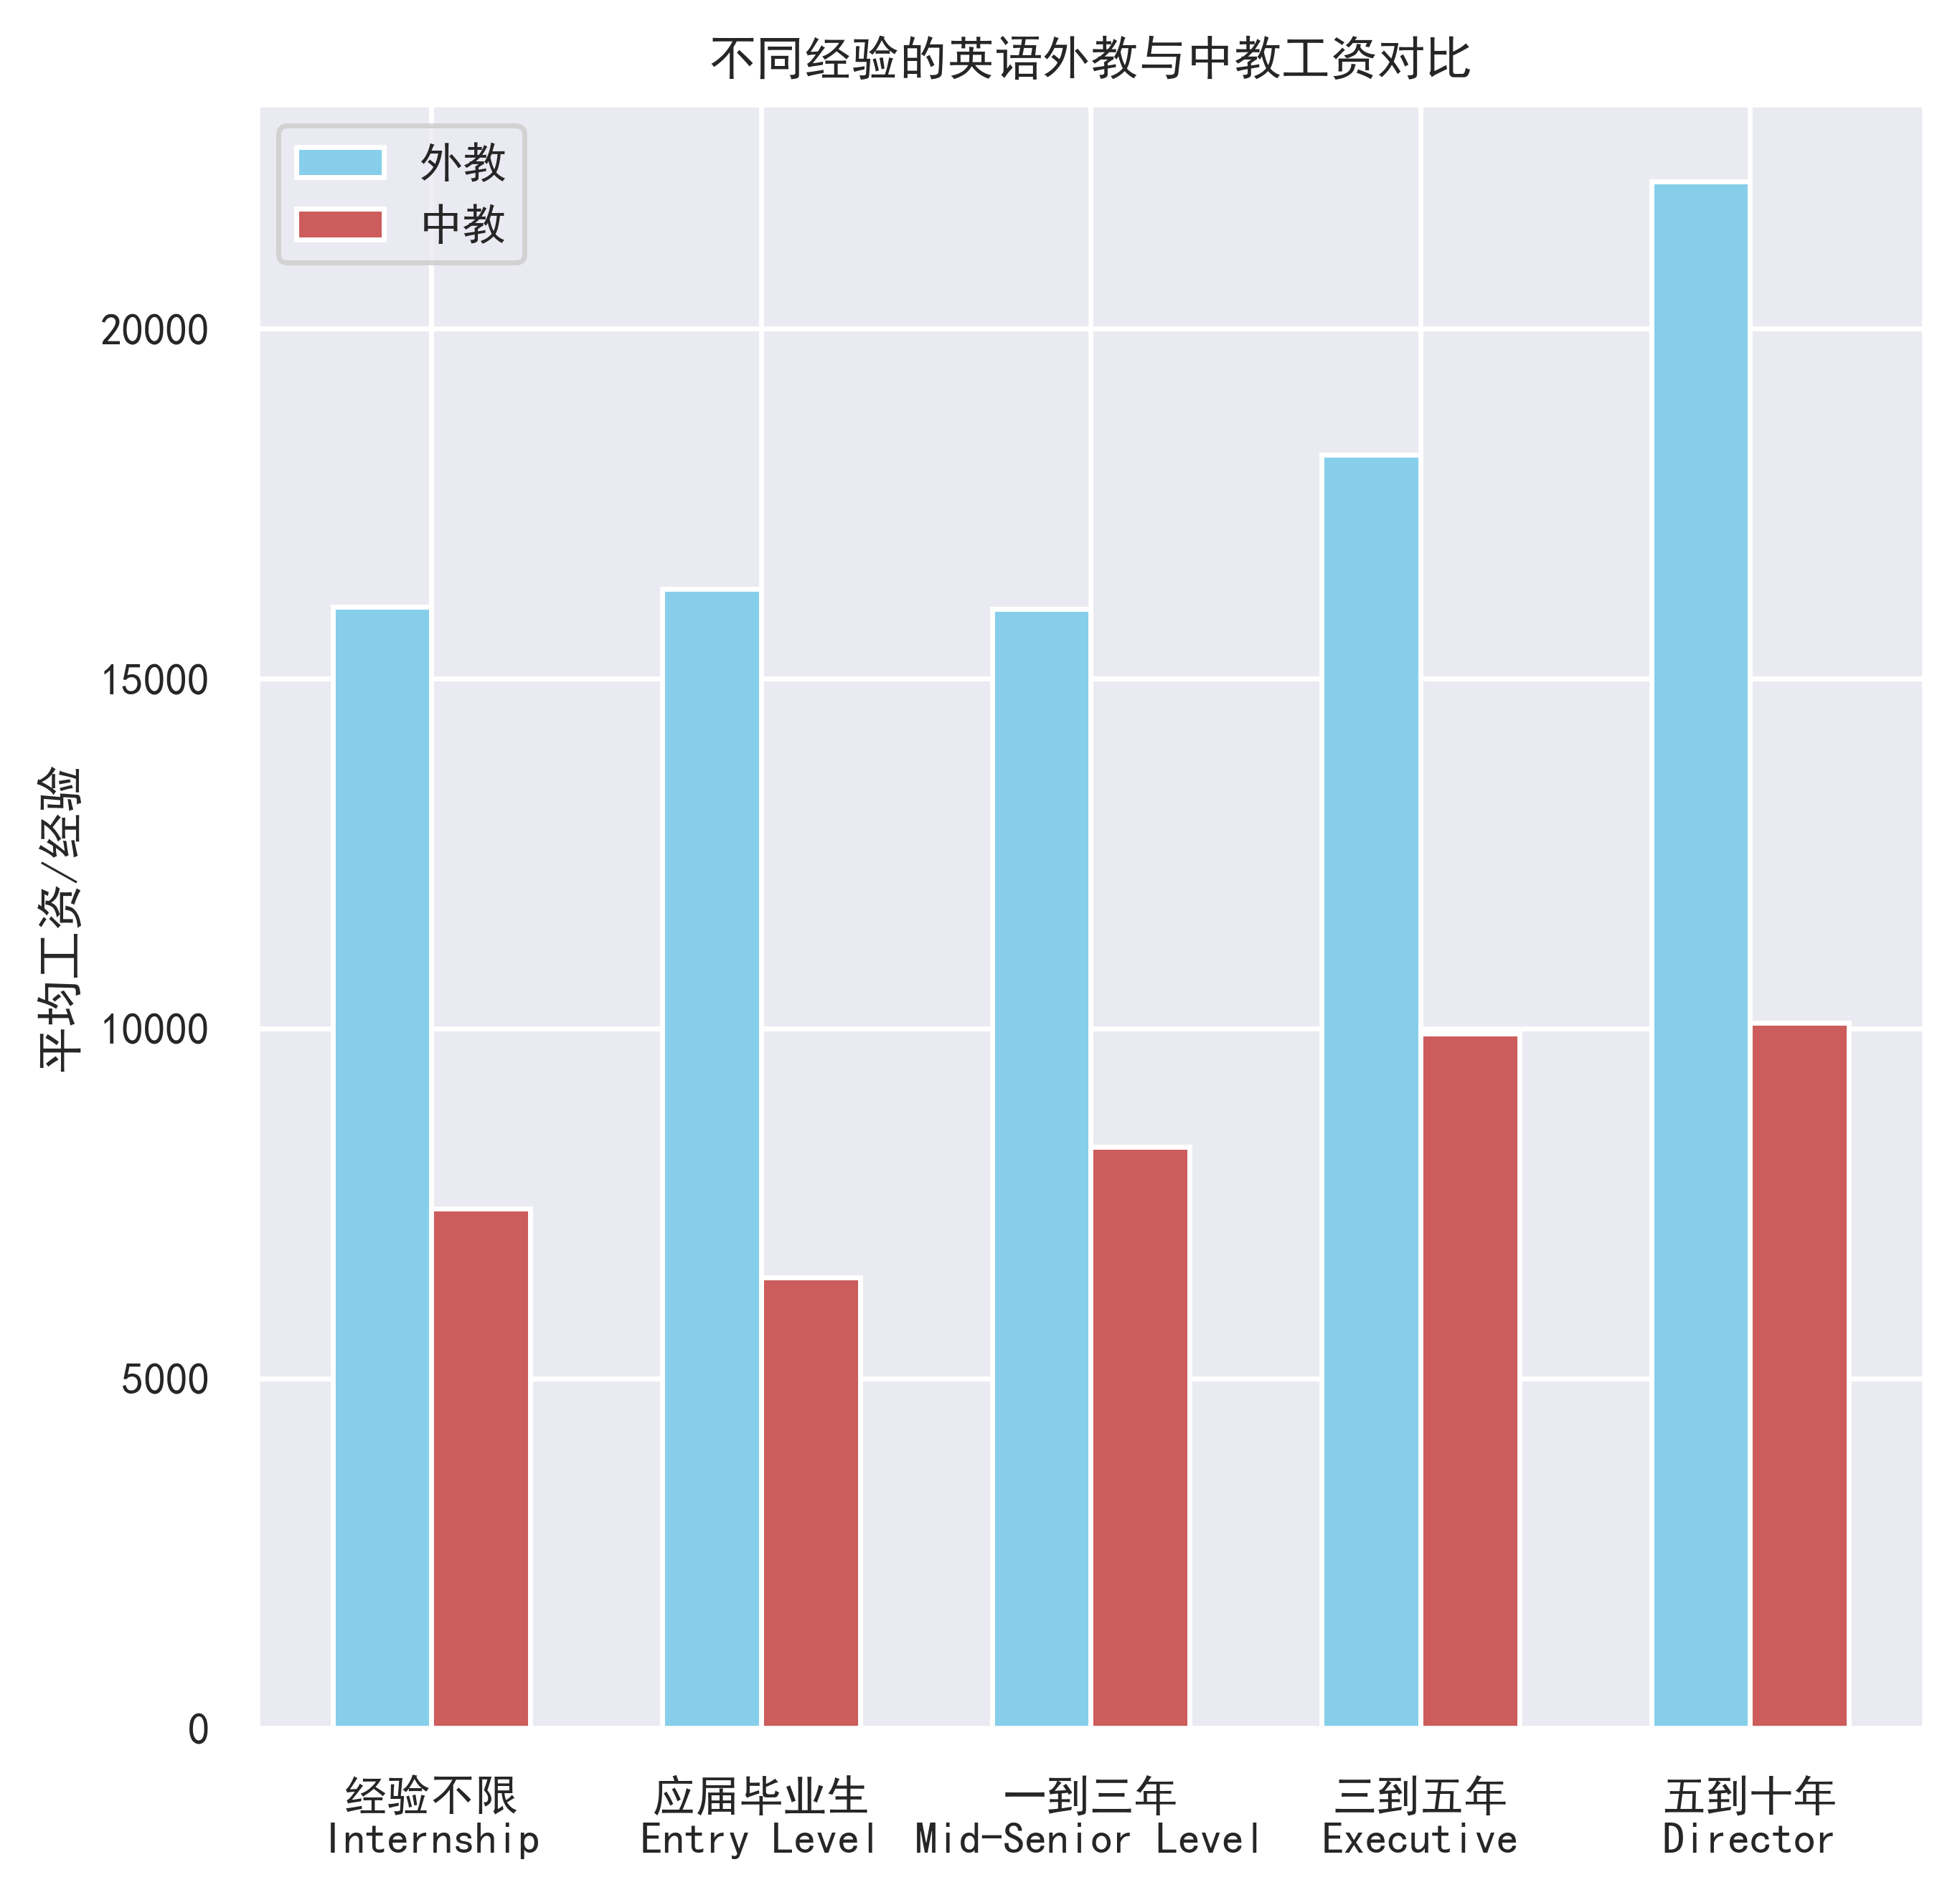

In [137]:
sns.set(font='SimHei',font_scale=0.8)  # 解决Seaborn中文显示问题并调整字体大小
ind = np.arange(len(attr))  # x轴的刻度位置
width = 0.3  # 柱子的宽度
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, value1, width, color='SkyBlue', label='外教')
rects2 = ax.bar(ind + width/2, value2, width, color='IndianRed', label='中教')
ax.set_ylabel('平均工资/经验')
ax.set_title('不同经验的英语外教与中教工资对比')
plt.xticks(ind,attr)
ax.legend()

plt.show()

### 3.1.3通过学历进行对比
* 相似的学历水平下，外教的平均工资大概是中教的1.8-2.0倍左右

In [205]:
np.round(data_jlc.groupby('education')['salary_clean'].mean(),1)

education
Any education    14783.0
Associate        11958.3
Bachelor         16889.9
Master           20750.0
Name: salary_clean, dtype: float64

In [206]:
np.round(data_wx.groupby('degree')['salary_clean'].mean(),1)

degree
中专/高中     4625.0
大专        7086.2
学历不限      7140.6
本科        8289.2
硕士       12388.9
Name: salary_clean, dtype: float64

In [214]:
attr = ['学历不限\nAny education', '中专/高中', '大专\nAssociate',
        '本科\nBachelor', '硕士\nMaster']
value1 = [14783.0, np.nan, 11958.3, 16889.9, 20750.0]
value2 = [7140.6, 4625.0, 7086.2, 8289.2, 12388.9]

bar = Bar("不同学历的英语外教与中教工资对比", width = 700,height=500)
bar.add(name="外教", x_axis=attr, y_axis=value1, xaxis_label_textsize=15, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar.add(name="中教", x_axis=attr, y_axis=value2, xaxis_label_textsize=15, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar.render('不同学历的英语外教与中教工资对比.html')

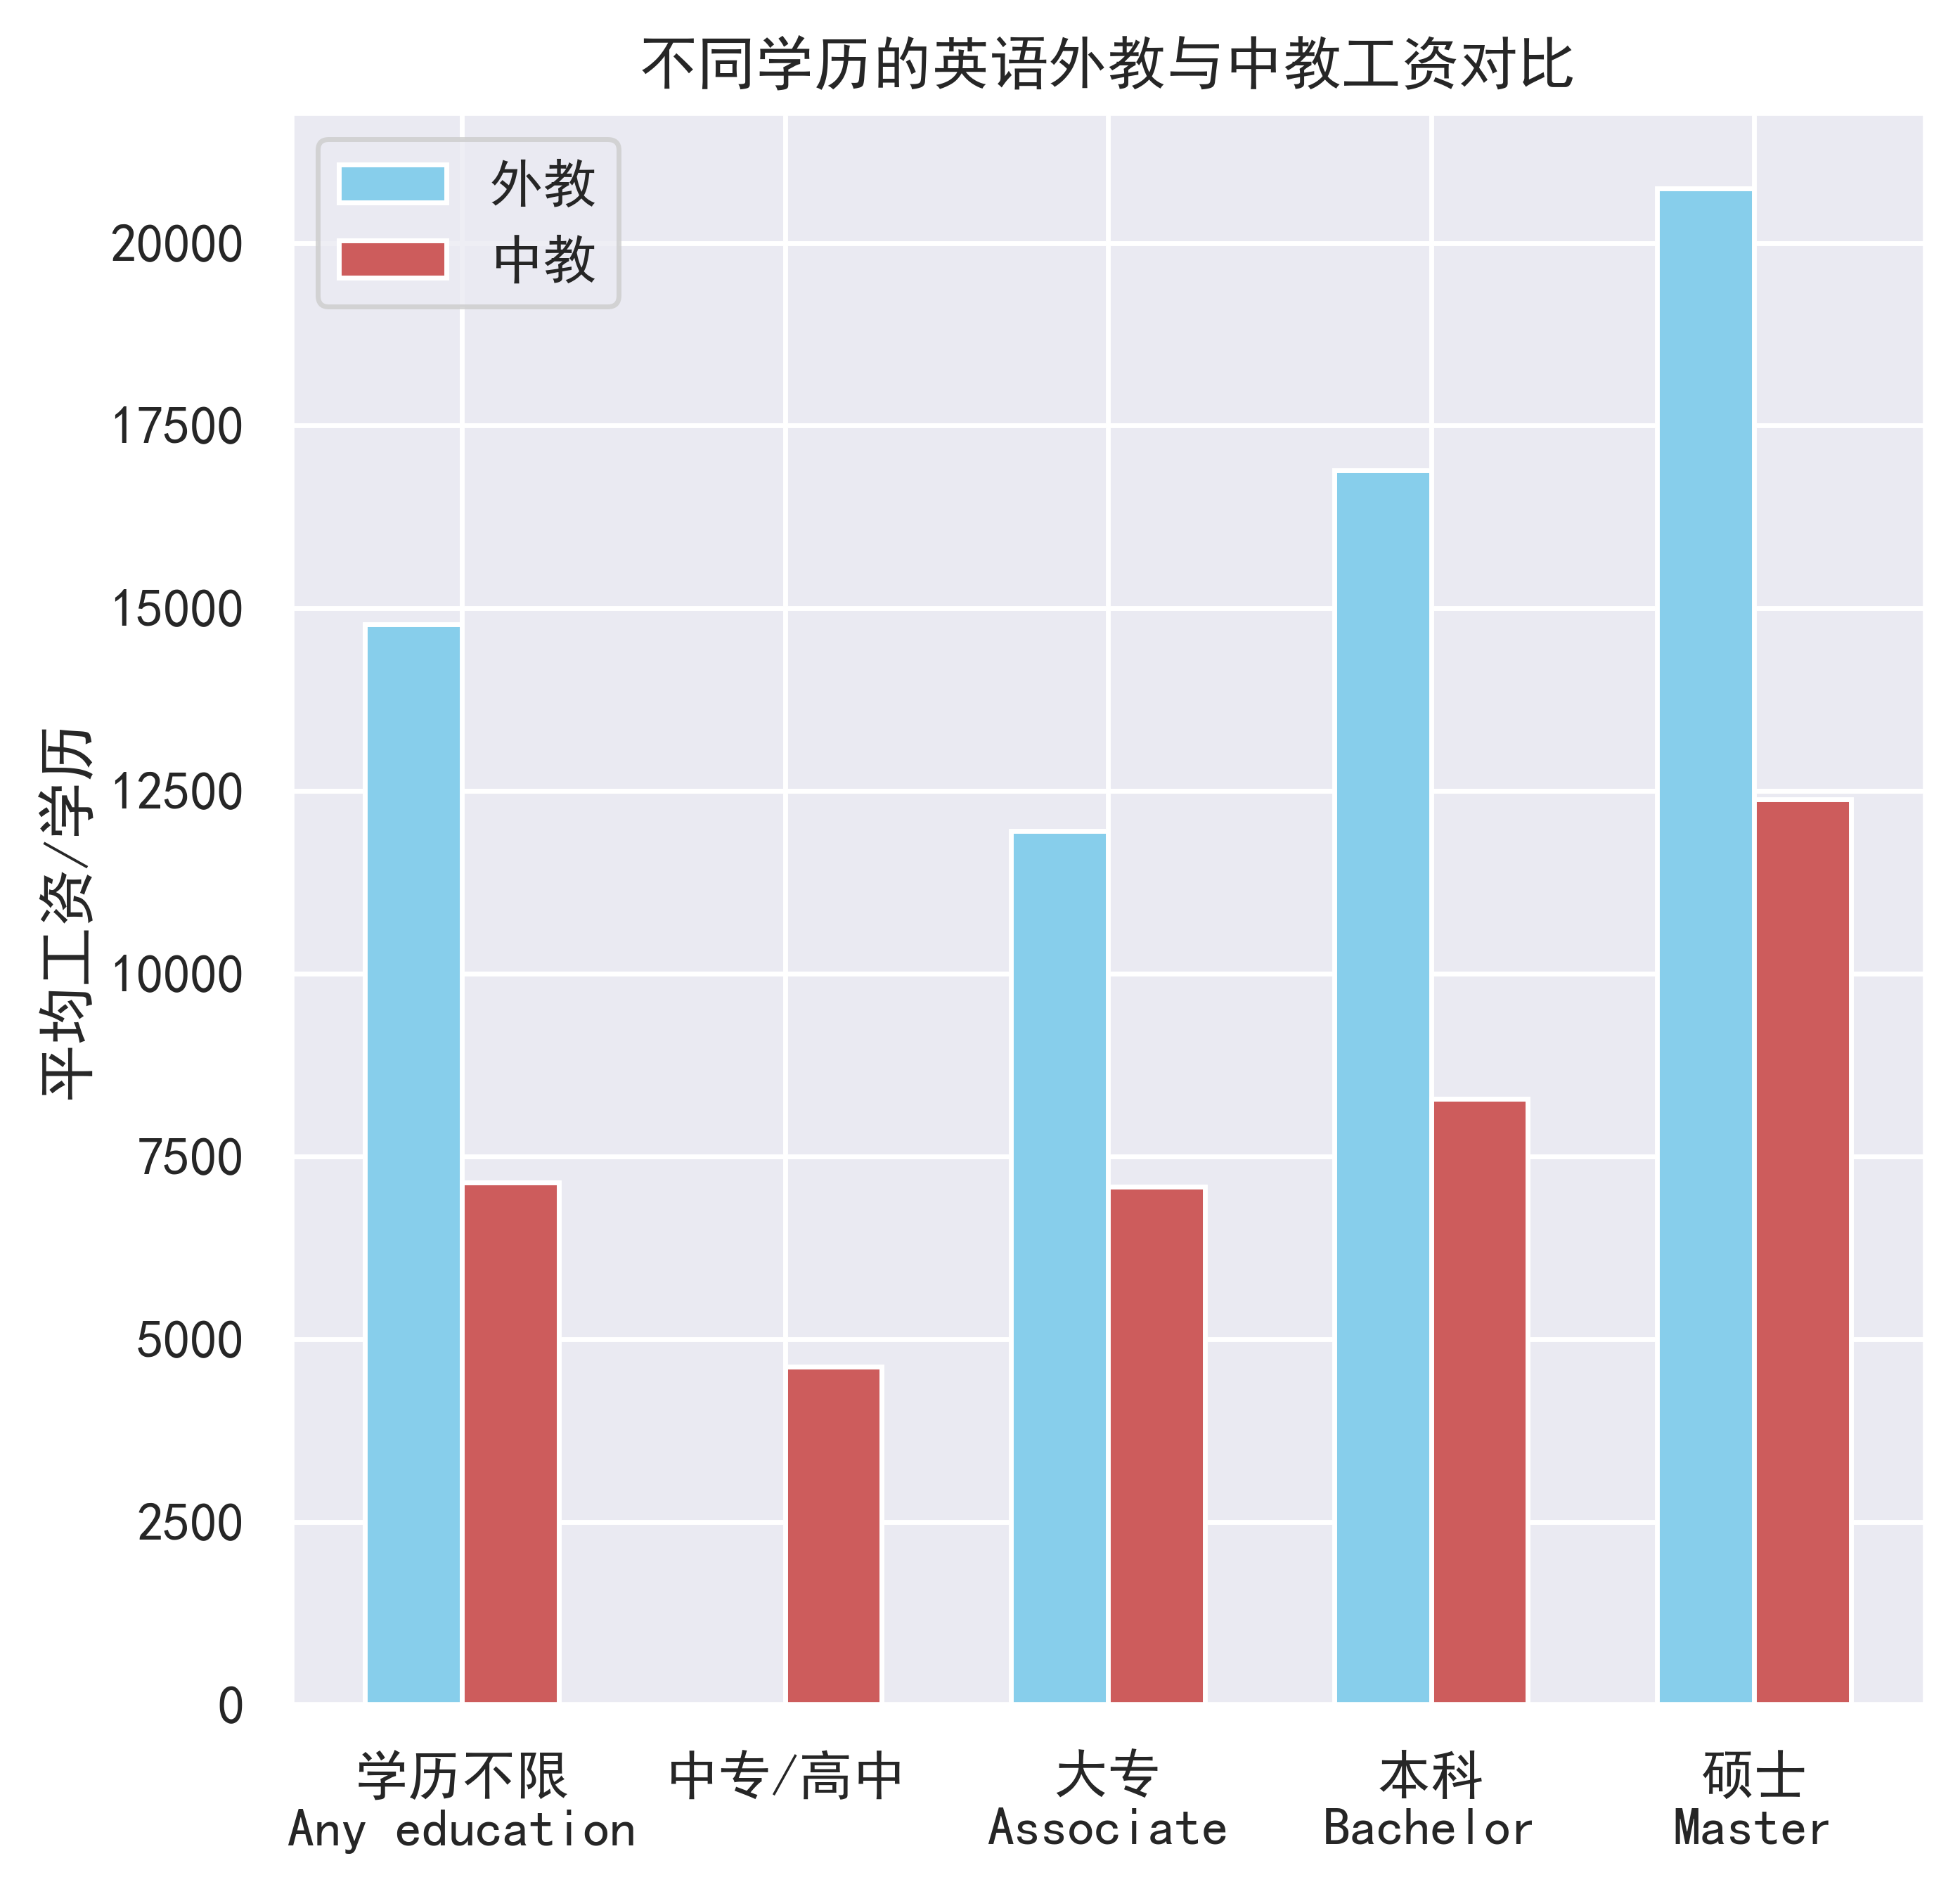

In [215]:
sns.set(font='SimHei',font_scale=1)  # 解决Seaborn中文显示问题并调整字体大小
ind = np.arange(len(attr))  # x轴的刻度位置
width = 0.3  # 柱子的宽度
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, value1, width, color='SkyBlue', label='外教')
rects2 = ax.bar(ind + width/2, value2, width, color='IndianRed', label='中教')
ax.set_ylabel('平均工资/学历')
ax.set_title('不同学历的英语外教与中教工资对比')
plt.xticks(ind,attr)
ax.legend()

plt.show()

### 3.2市场对外教的经验和学历需求如何？
### 3.2.1对外教经验需求比例
* 对Entry Level/入门级的需求比例最大，达到了45.7%
* 总体来说对相对年轻，经验一般的外教需求量大(超过九成)

In [257]:
exp_demand = np.round(data_jlc['exp'].value_counts()/data_jlc['exp'].value_counts().sum()*100, 1)

In [258]:
exp_demand

Entry Level         45.7
Mid-Senior Level    25.0
Internship          22.1
Executive            5.7
Director             1.5
Name: exp, dtype: float64

In [259]:
attr = ['经验不限\nInternship', '入门级\nEntry Level', '一到三年\nMid-Senior Level',
        '三到五年\nExecutive', '五到十年\nDirector']
value1 = [22.1, 45.7, 25.0, 5.7, 1.5]

bar = Bar("不同经验的英语外教需求比例", width = 700,height=500)
bar.add(name="外教", x_axis=attr, y_axis=value1, xaxis_label_textsize=15, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar.render('不同经验的英语外教需求比例.html')

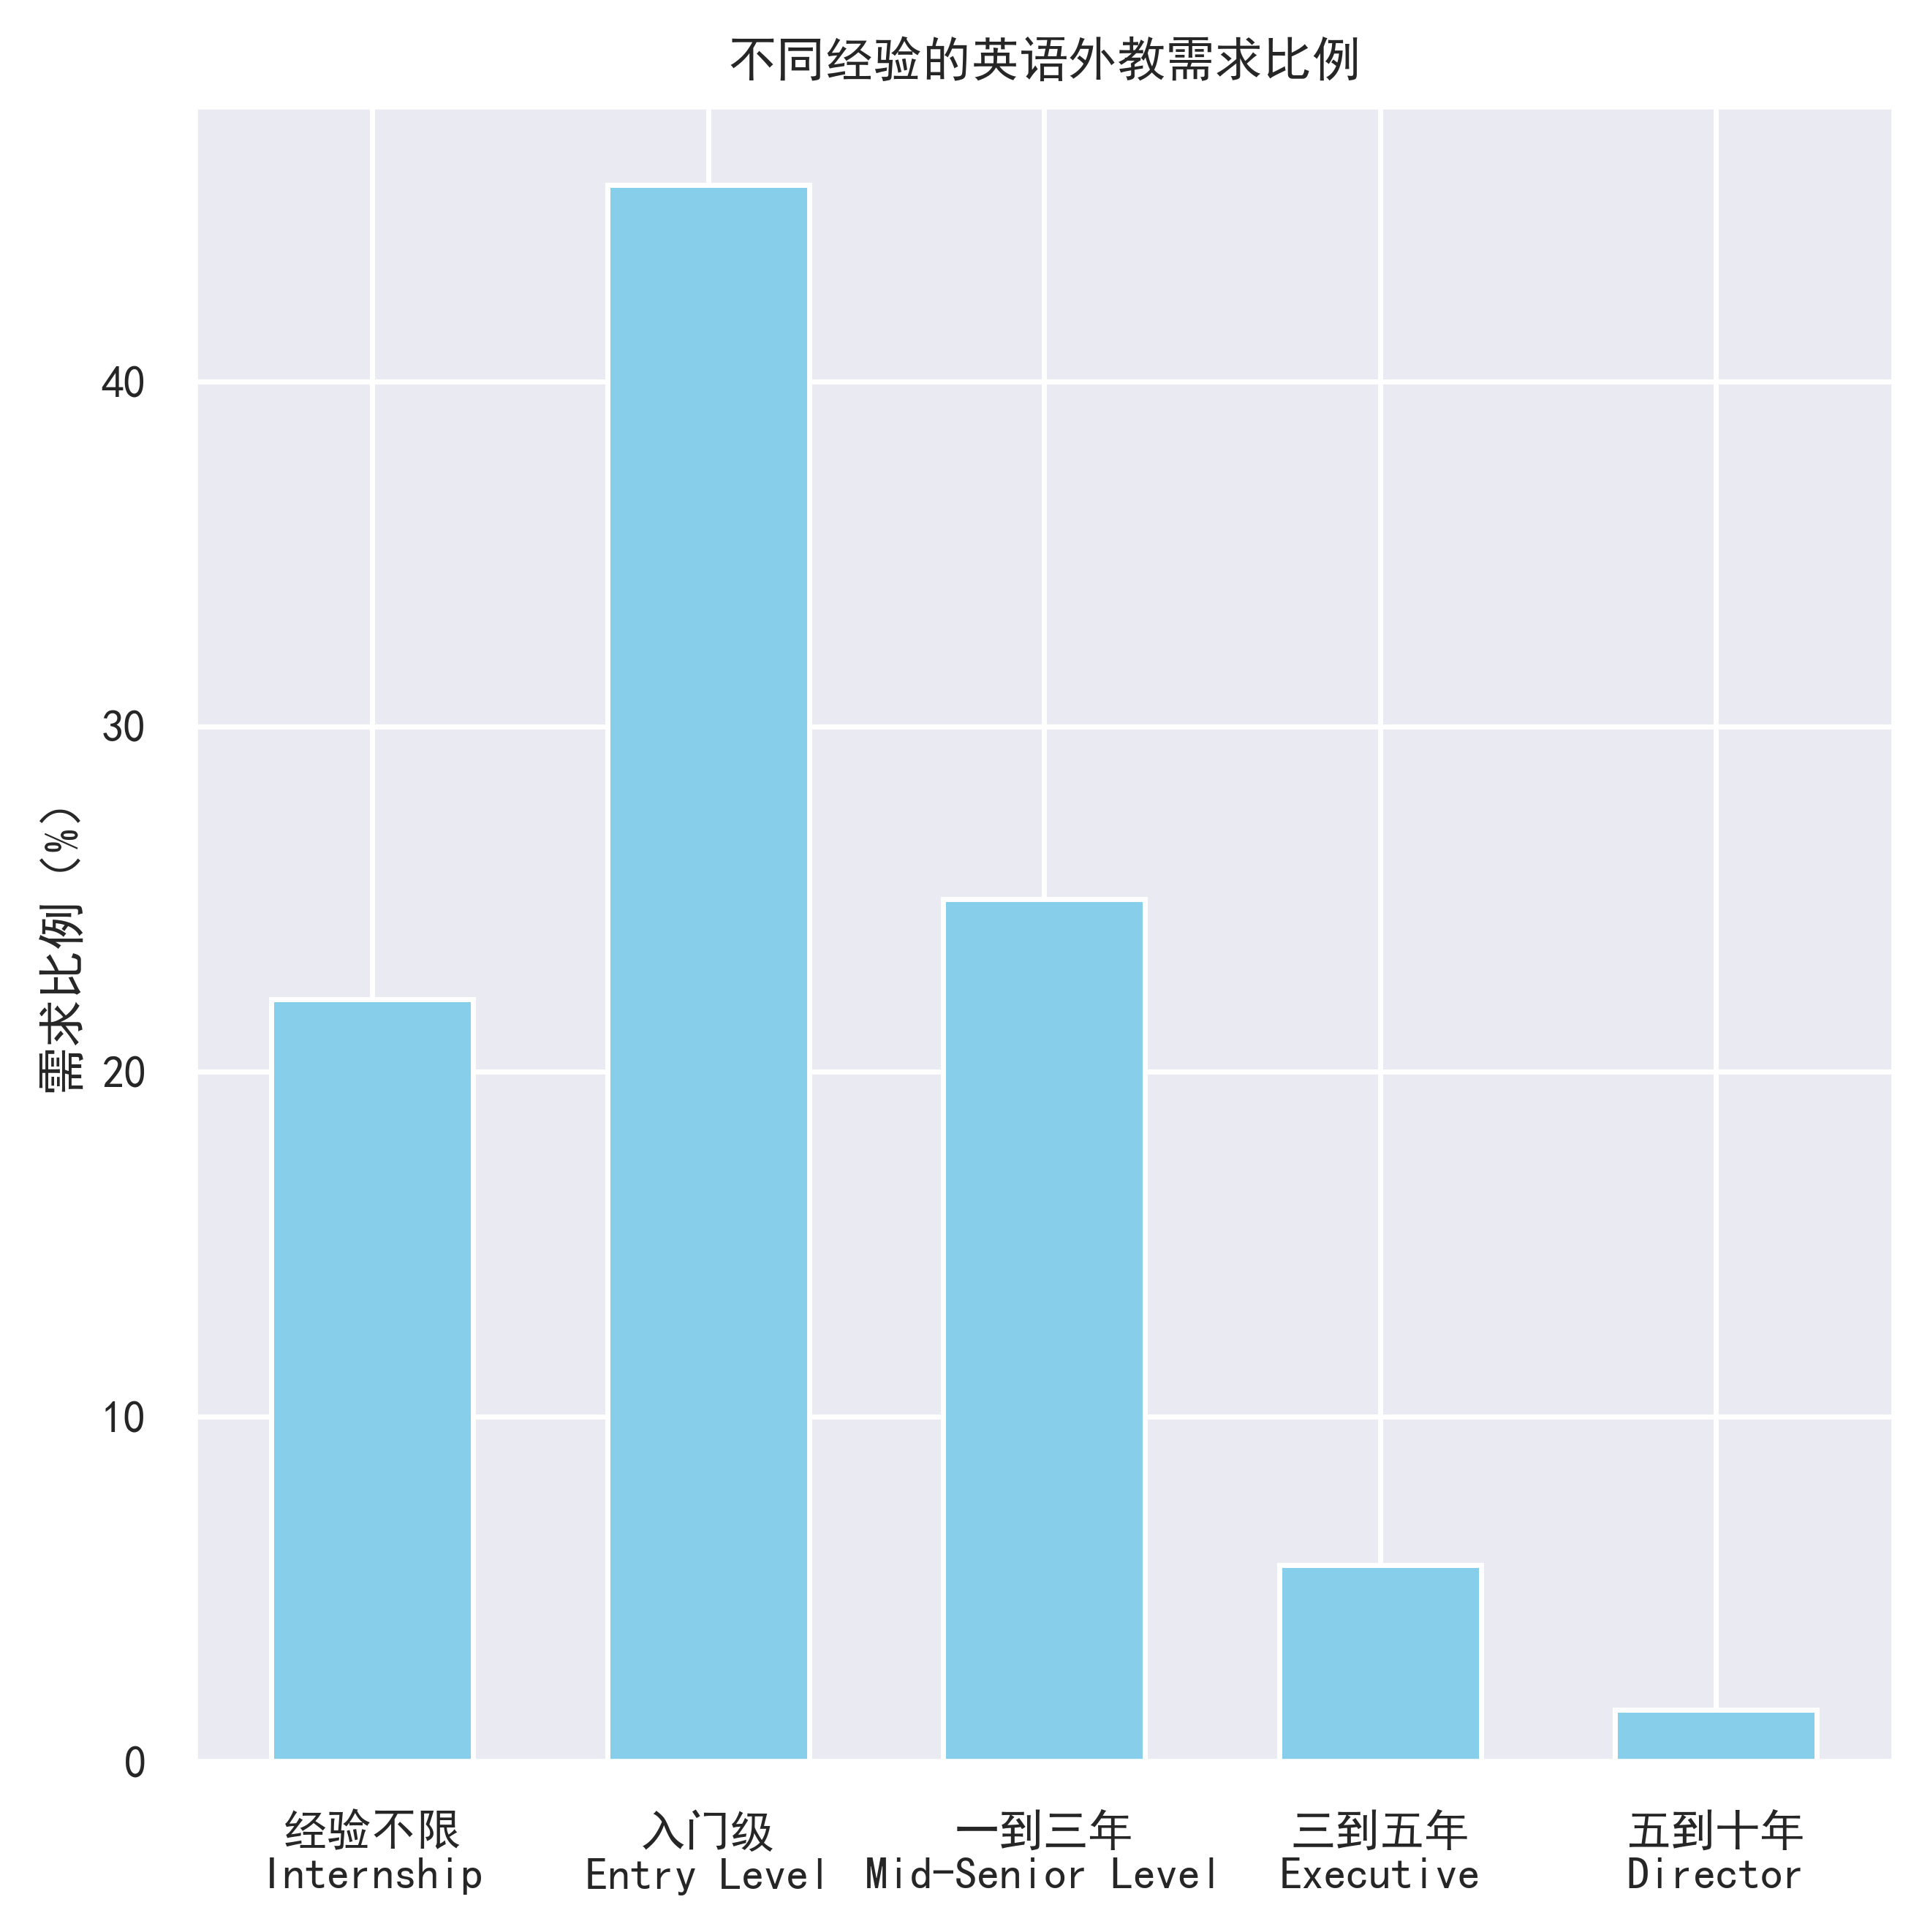

In [261]:
sns.set(font='SimHei',font_scale=0.8)  # 解决Seaborn中文显示问题并调整字体大小
ind = np.arange(len(attr))  # x轴的刻度位置
width = 0.6  # 柱子的宽度
fig, ax = plt.subplots()
rects1 = ax.bar(ind, value1, width, color='SkyBlue', label='外教')
ax.set_ylabel('需求比例（%）')
ax.set_title('不同经验的英语外教需求比例')
plt.xticks(ind,attr)

plt.show()

### 3.2.2对外教学历需求比例
* 对Bachelor/本科以上的需求比例最大，达到了74.8%
* 加上学历不限的23.5%，已经达到了98%的比例

In [251]:
degree_demand = np.round(data_jlc['education'].value_counts()/data_jlc['education'].value_counts().sum()*100, 1)

In [252]:
degree_demand

Bachelor         74.8
Any education    23.5
Associate         1.2
Master            0.4
Name: education, dtype: float64

In [253]:
attr = ['学历不限\nAny education', '社区大学\nAssociate', '本科\nBachelor',
        '硕士\nMaster']
value1 = [23.5, 1.2, 74.8, 0.4]

bar = Bar("不同学历的英语外教需求比例", width = 700,height=500)
bar.add(name="外教", x_axis=attr, y_axis=value1, xaxis_label_textsize=15, legend_top=30,
        yaxis_label_textsize=20, is_label_show=True)
bar.render('不同学历的英语外教需求比例.html')

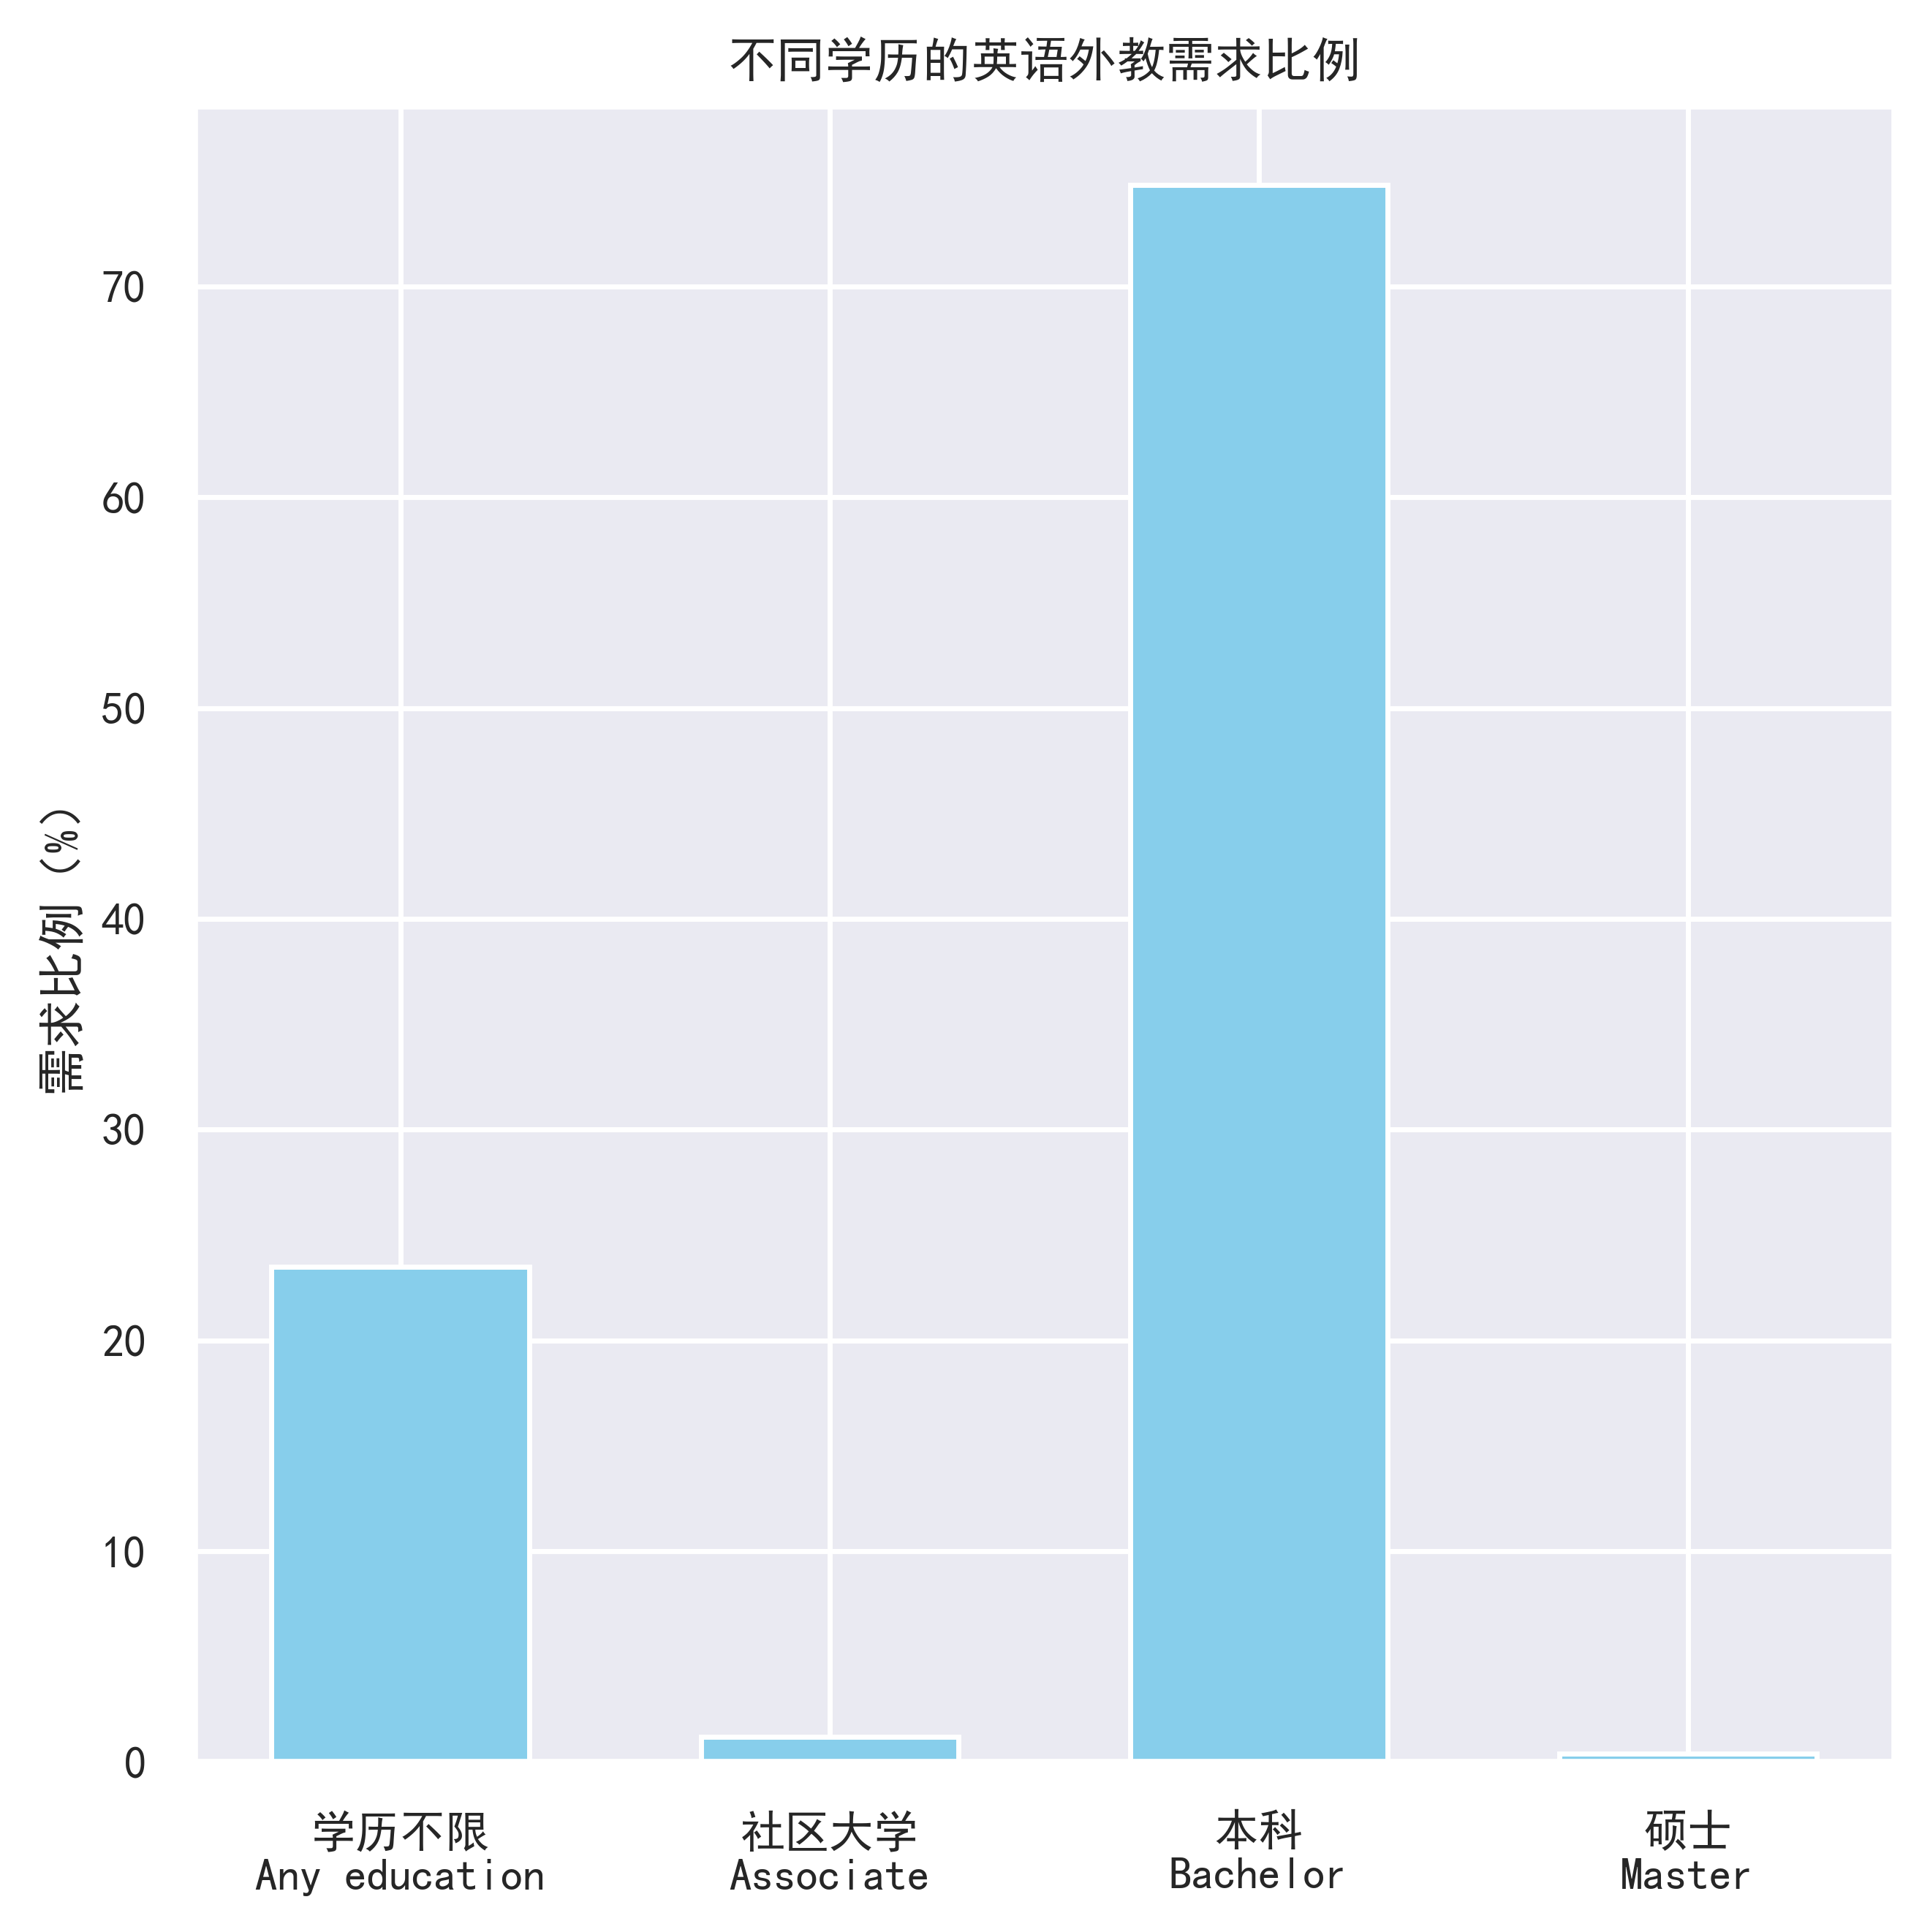

In [254]:
sns.set(font='SimHei',font_scale=0.8)  # 解决Seaborn中文显示问题并调整字体大小
ind = np.arange(len(attr))  # x轴的刻度位置
width = 0.6  # 柱子的宽度
fig, ax = plt.subplots()
rects1 = ax.bar(ind, value1, width, color='SkyBlue', label='外教')
ax.set_ylabel('需求比例（%）')
ax.set_title('不同学历的英语外教需求比例')
plt.xticks(ind,attr)

plt.show()

### 3.3哪些城市对外教的需求多？
* 北京以441个职位遥遥领先
* 北上广深杭占据前五，其余也都是知名大城市

In [255]:
area_demand = data_jlc['area'].value_counts().nlargest(11).drop('Others')

In [256]:
area_demand

Beijing      411
Shanghai      99
Hangzhou      92
Guangzhou     37
Shenzhen      36
Wuhan         26
Chengdu       22
Nanjing       17
Qingdao       15
Ningbo        10
Name: area, dtype: int64

In [232]:
bar = Bar("对外教需求排名前10的城市", width = 700,height=500)
attr= ['北京', '上海', '杭州', '广州', '深圳','武汉','成都','南京', '青岛', '宁波']
bar.add(name="", x_axis=attr, 
        y_axis=area_demand.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True,legend_top=30, label_color = ['#130f40'])
bar.render('对外教需求排名前10的城市.html')

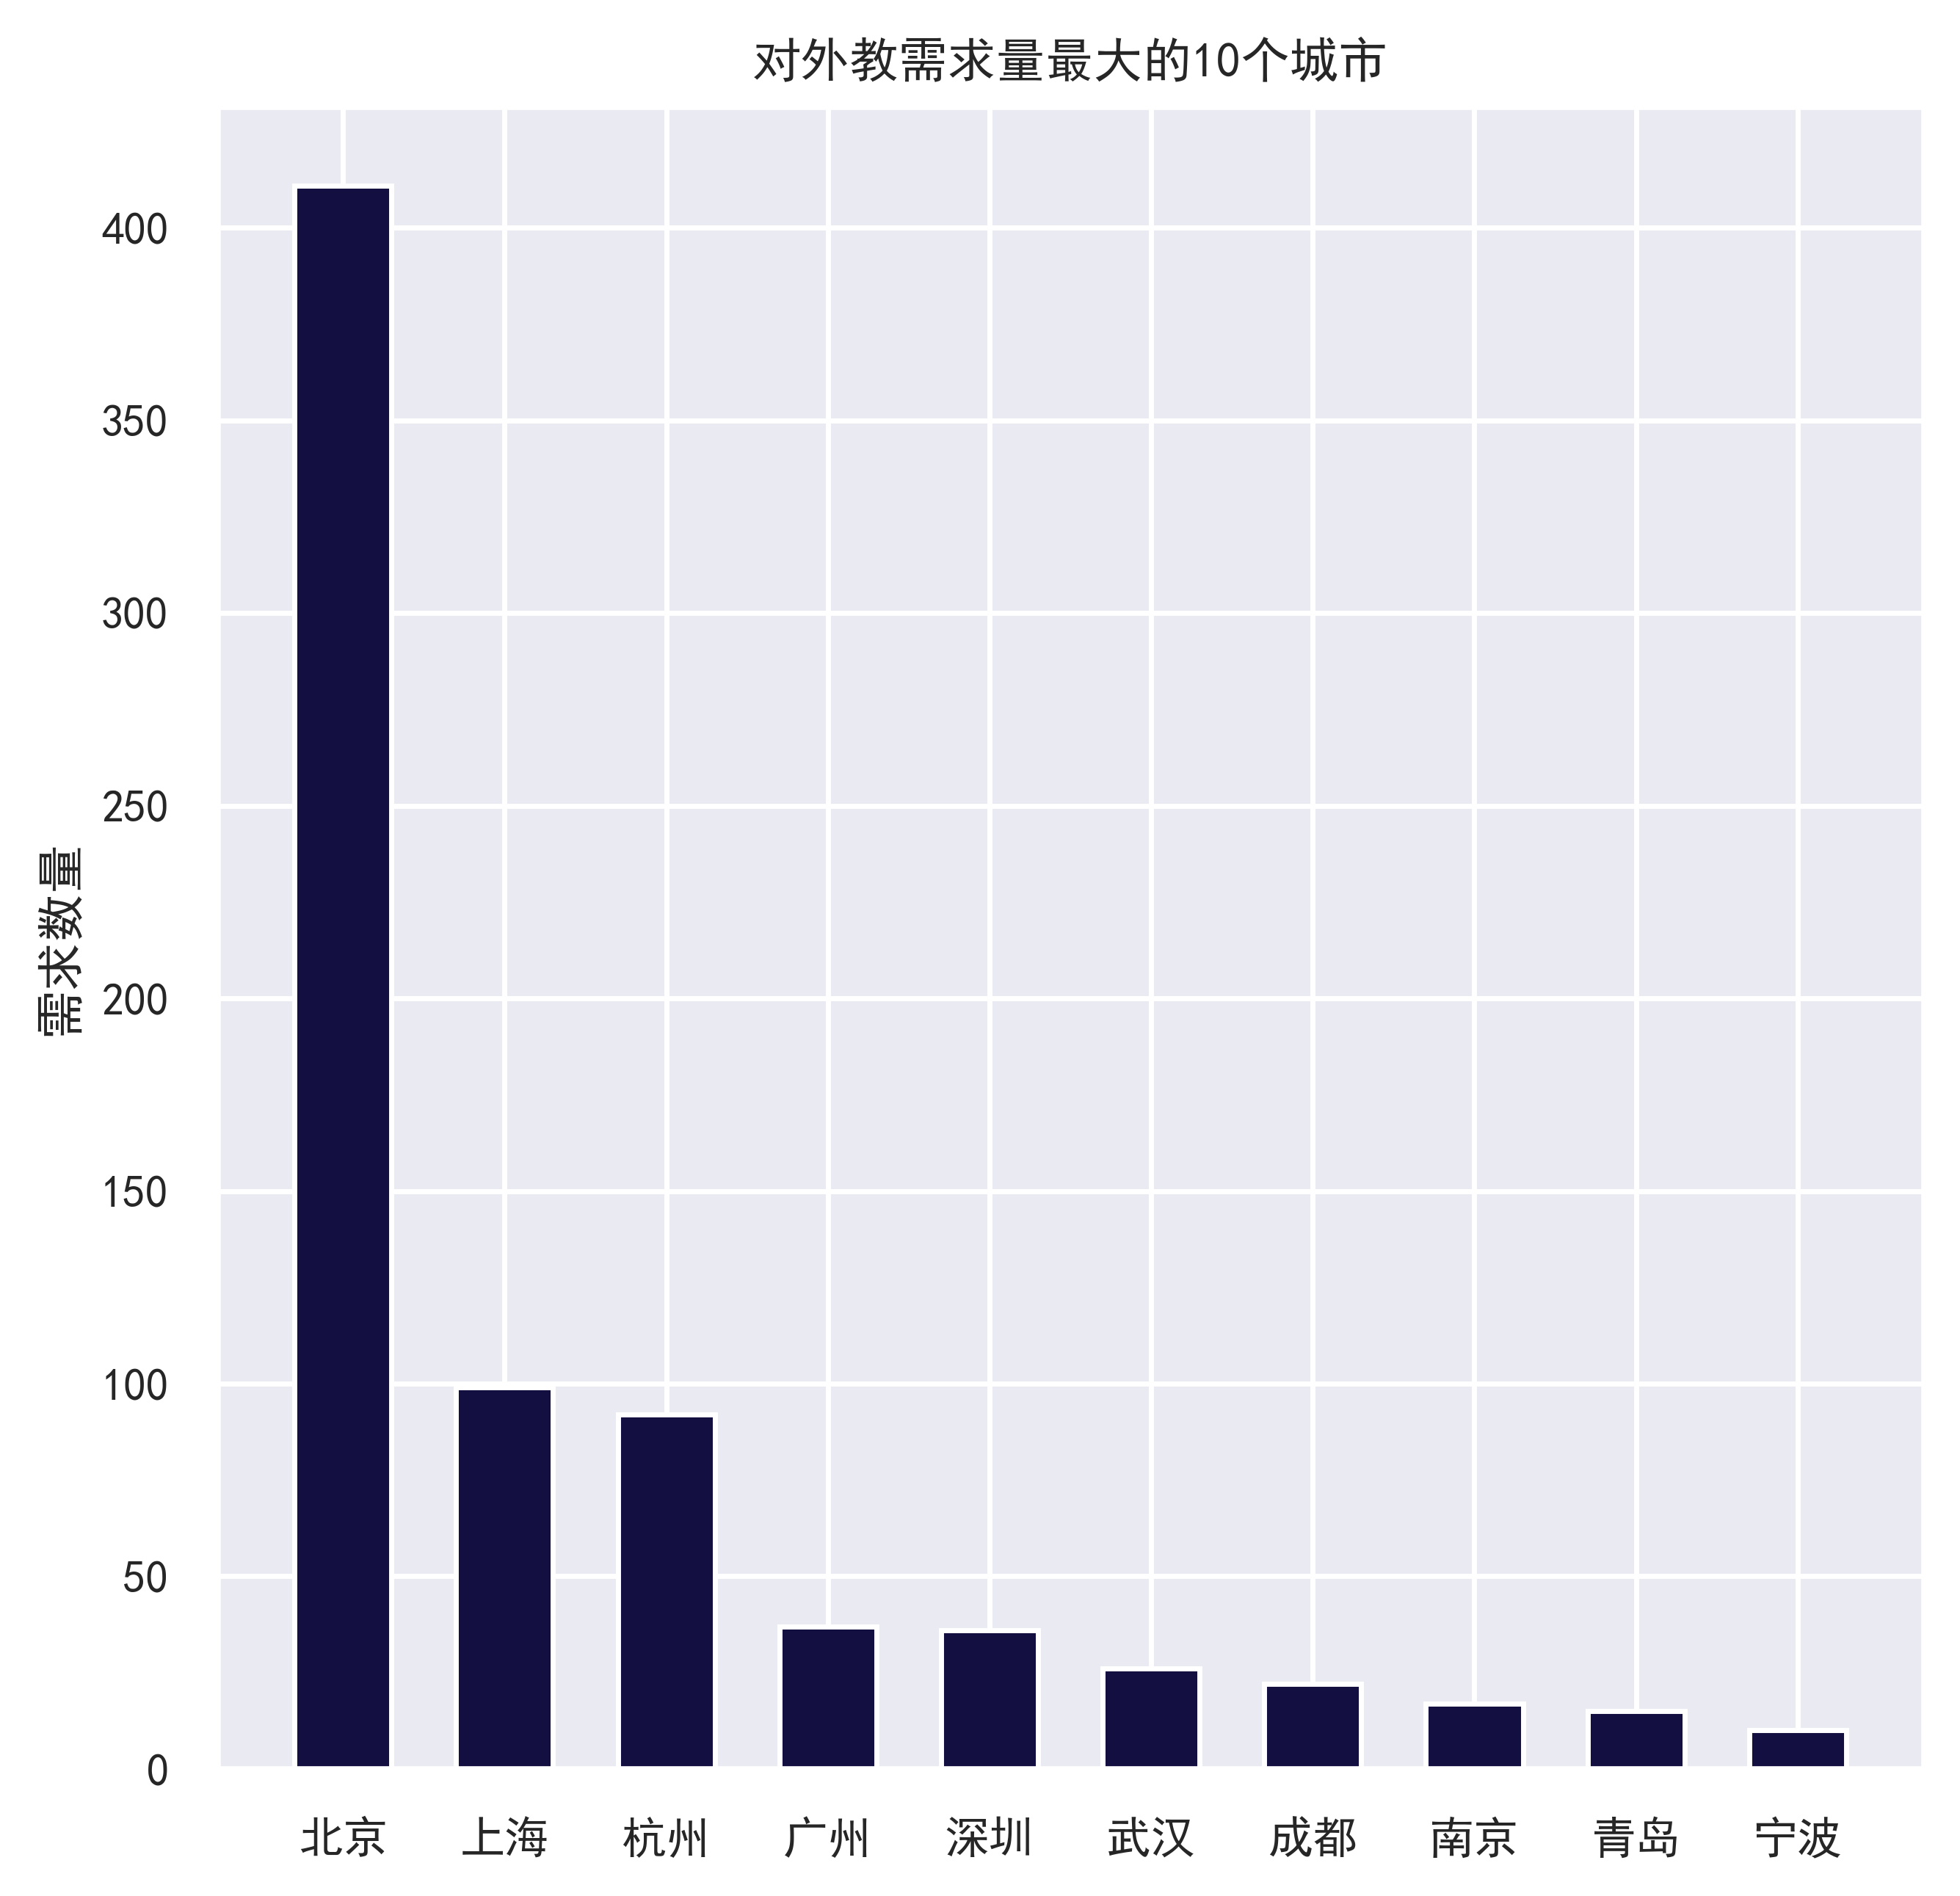

In [235]:
sns.set(font='SimHei',font_scale=0.8)  # 每次要针对画的图调整字体大小
ind = np.arange(len(attr))  # x轴的刻度位置
width = 0.6  # 柱子的宽度
fig, ax = plt.subplots()
rects1 = ax.bar(ind, area_demand.values, width, color='#130f40', label='外教')
ax.set_ylabel('需求数量')
ax.set_title('对外教需求量最大的10个城市')
plt.xticks(ind,attr)

plt.show()

####  对应城市的平均薪酬
* 在这10个城市中，外教的平均薪酬都在中教的2倍左右

In [236]:
salary_area = np.round(data_jlc.groupby('area')['salary_clean'].mean()[area_demand.index], 1)

In [237]:
salary_area

Beijing      17372.5
Shanghai     16863.1
Hangzhou     15781.5
Guangzhou    16256.8
Shenzhen     17638.9
Wuhan        15211.5
Chengdu      17602.3
Nanjing      13529.4
Qingdao      17366.7
Ningbo       15800.0
Name: salary_clean, dtype: float64

In [238]:
# 中教对应城市的平均薪酬
city10 = ['北京', '上海', '杭州','广州', '深圳',
          '武汉', '成都', '南京', '青岛', '宁波']
salary_area_china= np.round(data_wx[data_wx['city'].isin(city10)].groupby('city')['salary_clean'].mean(), 1)

In [239]:
salary_area_china

city
上海    8879.2
北京    9663.8
南京    7533.3
宁波    8047.6
广州    7257.2
成都    6160.4
杭州    8300.2
武汉    7439.7
深圳    8942.7
Name: salary_clean, dtype: float64

In [248]:
salary_area_china_values=[9663.8, 8879.2, 8300.2, 7257.2, 8942.7, 7439.7, 6160.4, 7533.3, 0, 8047.6]

bar = Bar("外教需求排名前10的城市中外教平均工资对比", width = 800,height=500)

bar.add("外教", city10, salary_area.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, legend_top=30)
bar.add("中教", city10, salary_area_china_values,
        xaxis_label_textsize=18, yaxis_label_textsize=20, is_label_show=True, legend_top=30)
bar.render('外教需求排名前10的城市中外教平均工资对比.html')

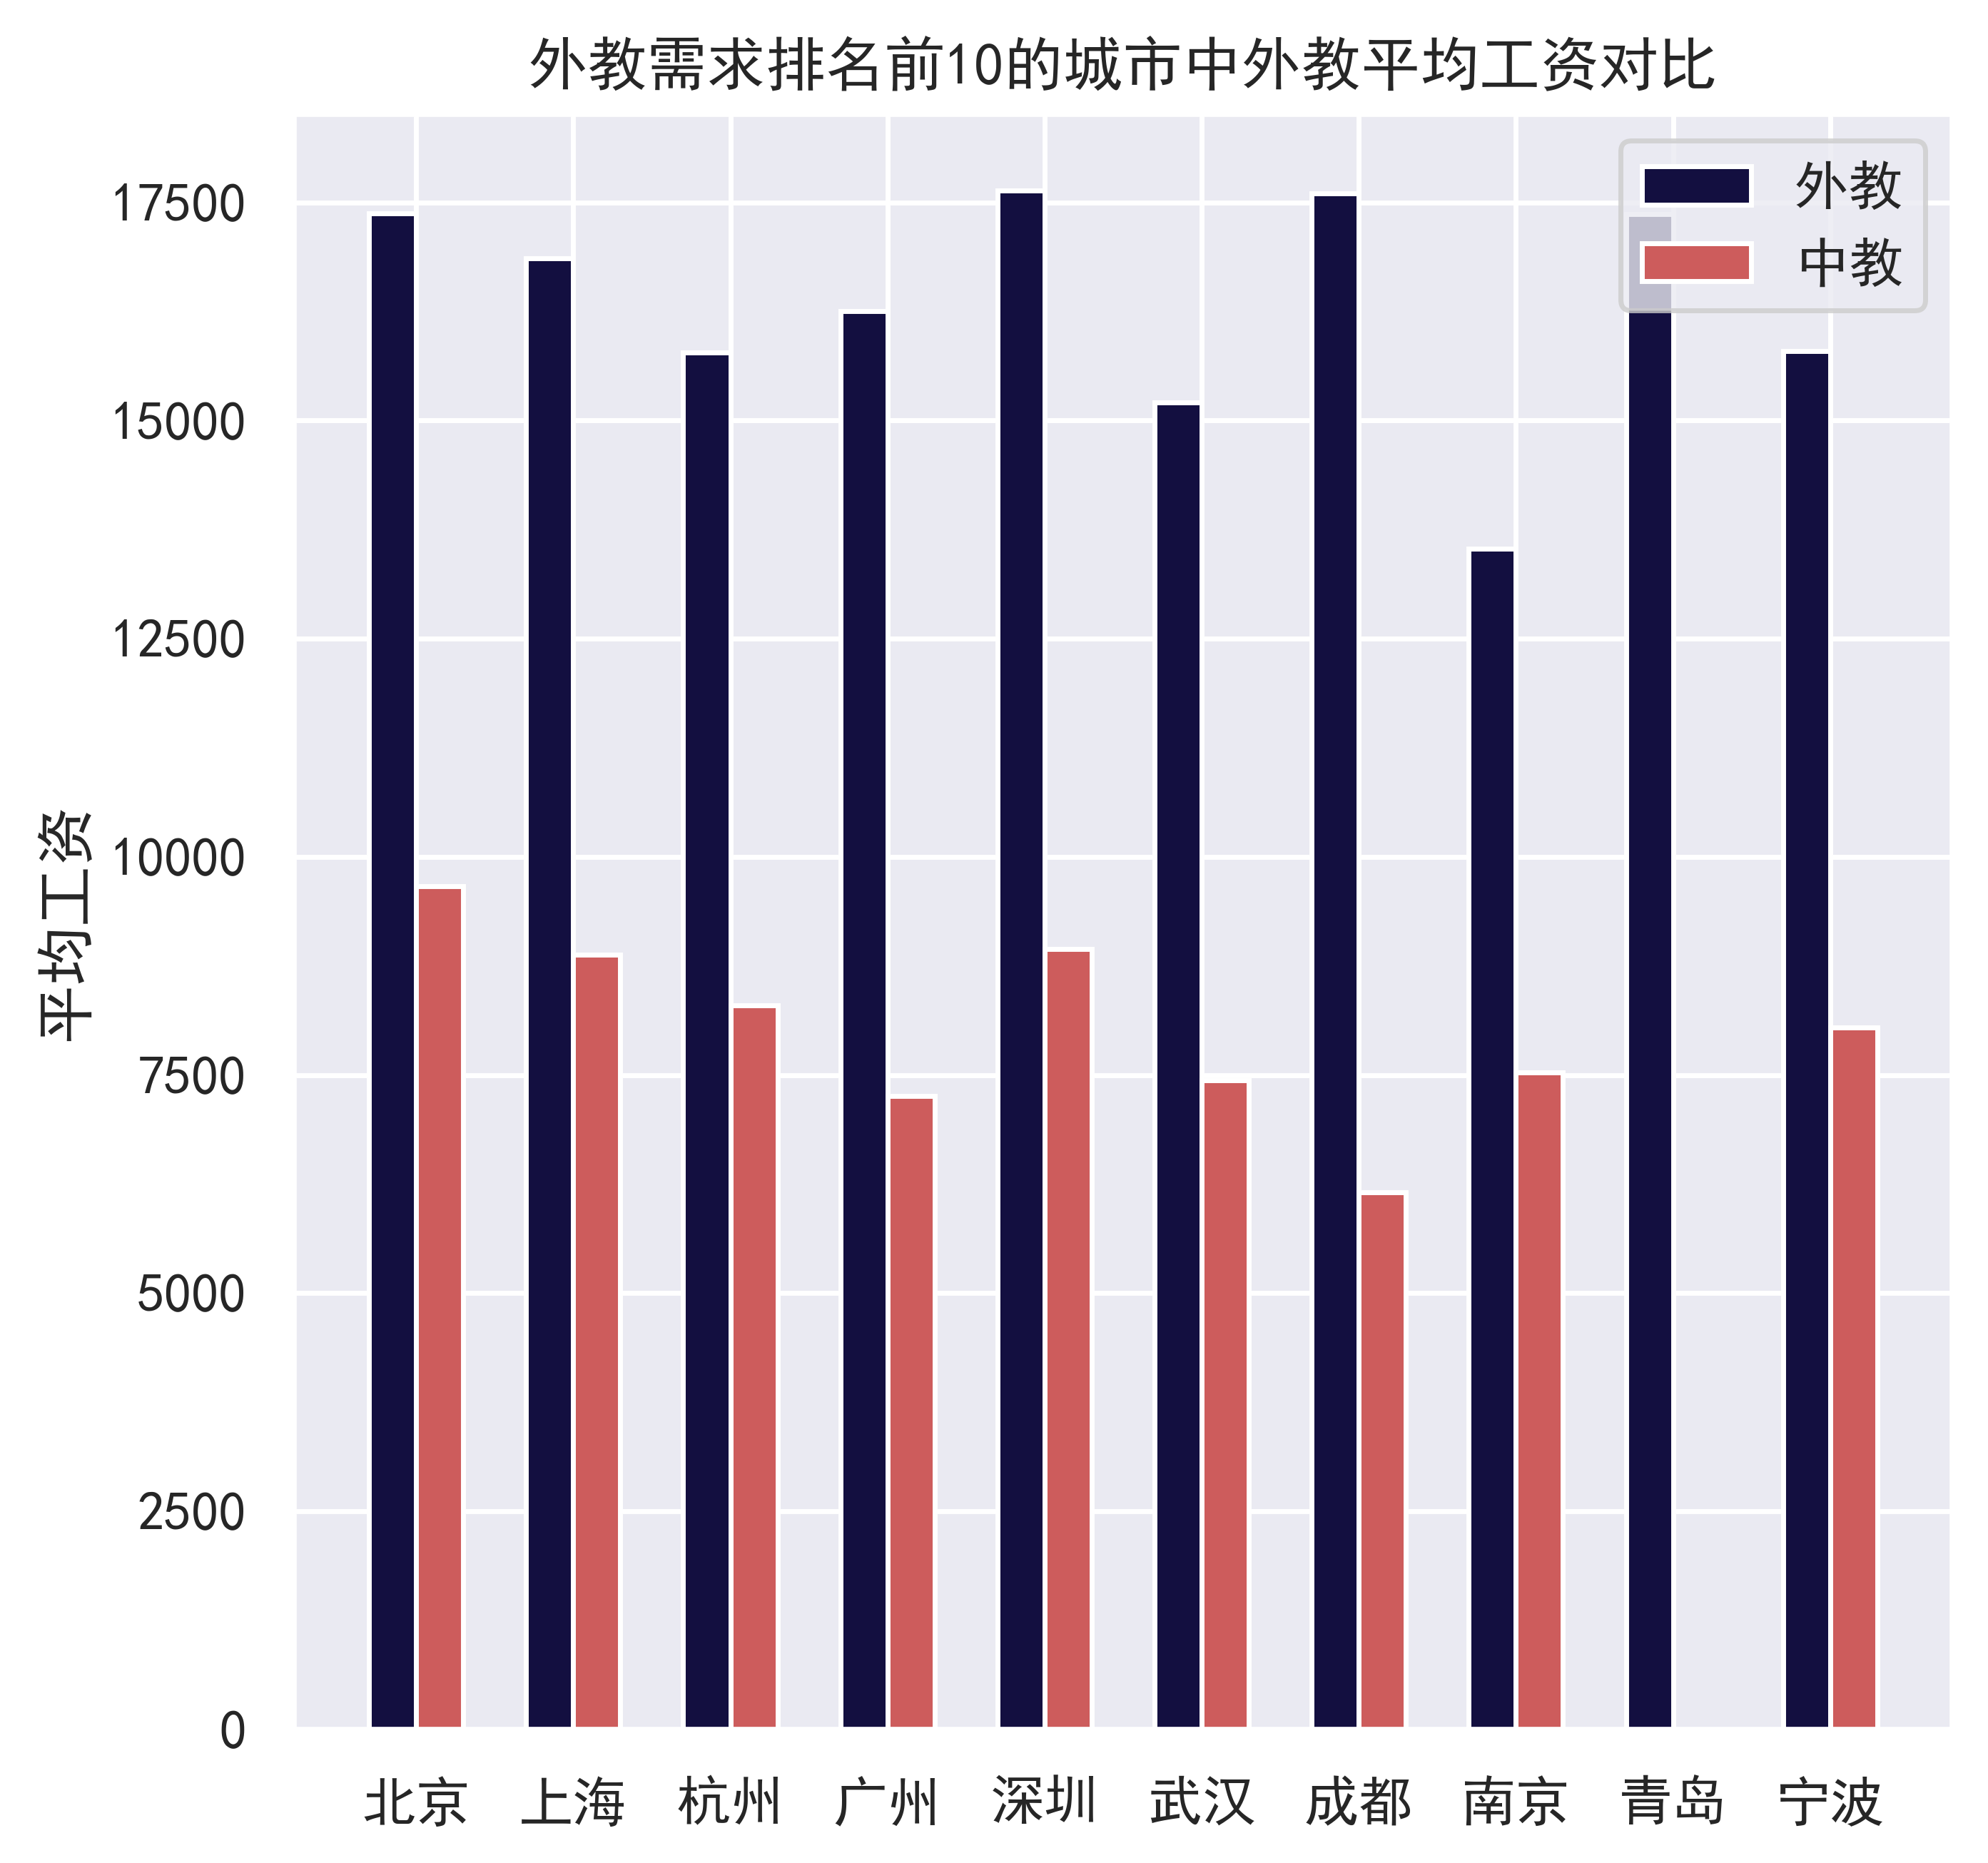

In [249]:
sns.set(font='SimHei',font_scale=1)  # 解决Seaborn中文显示问题并调整字体大小
ind = np.arange(len(city10))  # x轴的刻度位置
width = 0.3  # 柱子的宽度
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, salary_area.values, width, color='#130f40', label='外教')
rects2 = ax.bar(ind + width/2, salary_area_china_values, width, color='IndianRed', label='中教')
ax.set_ylabel('平均工资')
ax.set_title('外教需求排名前10的城市中外教平均工资对比')
plt.xticks(ind,city10)
ax.legend()

plt.show()

### 3.4 哪些类型的机构在招聘外教？

In [262]:
com_type_demand = data_jlc['com_type'].value_counts().nlargest(5)

In [263]:
com_type_demand

Teaching Center            479
School                     325
Others                      70
Consultancy/Legal/Admin     56
Outsourcing                 13
Name: com_type, dtype: int64

In [264]:
bar = Bar("对外教需求排名前5的单位类型", width = 600,height=500)

bar.add("", ['培训机构', '学校',  '其它','咨询机构', '外包机构'], 
        com_type_demand.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, label_color = ['#130f40'])
bar.render('对外教需求排名前5的单位类型.html')

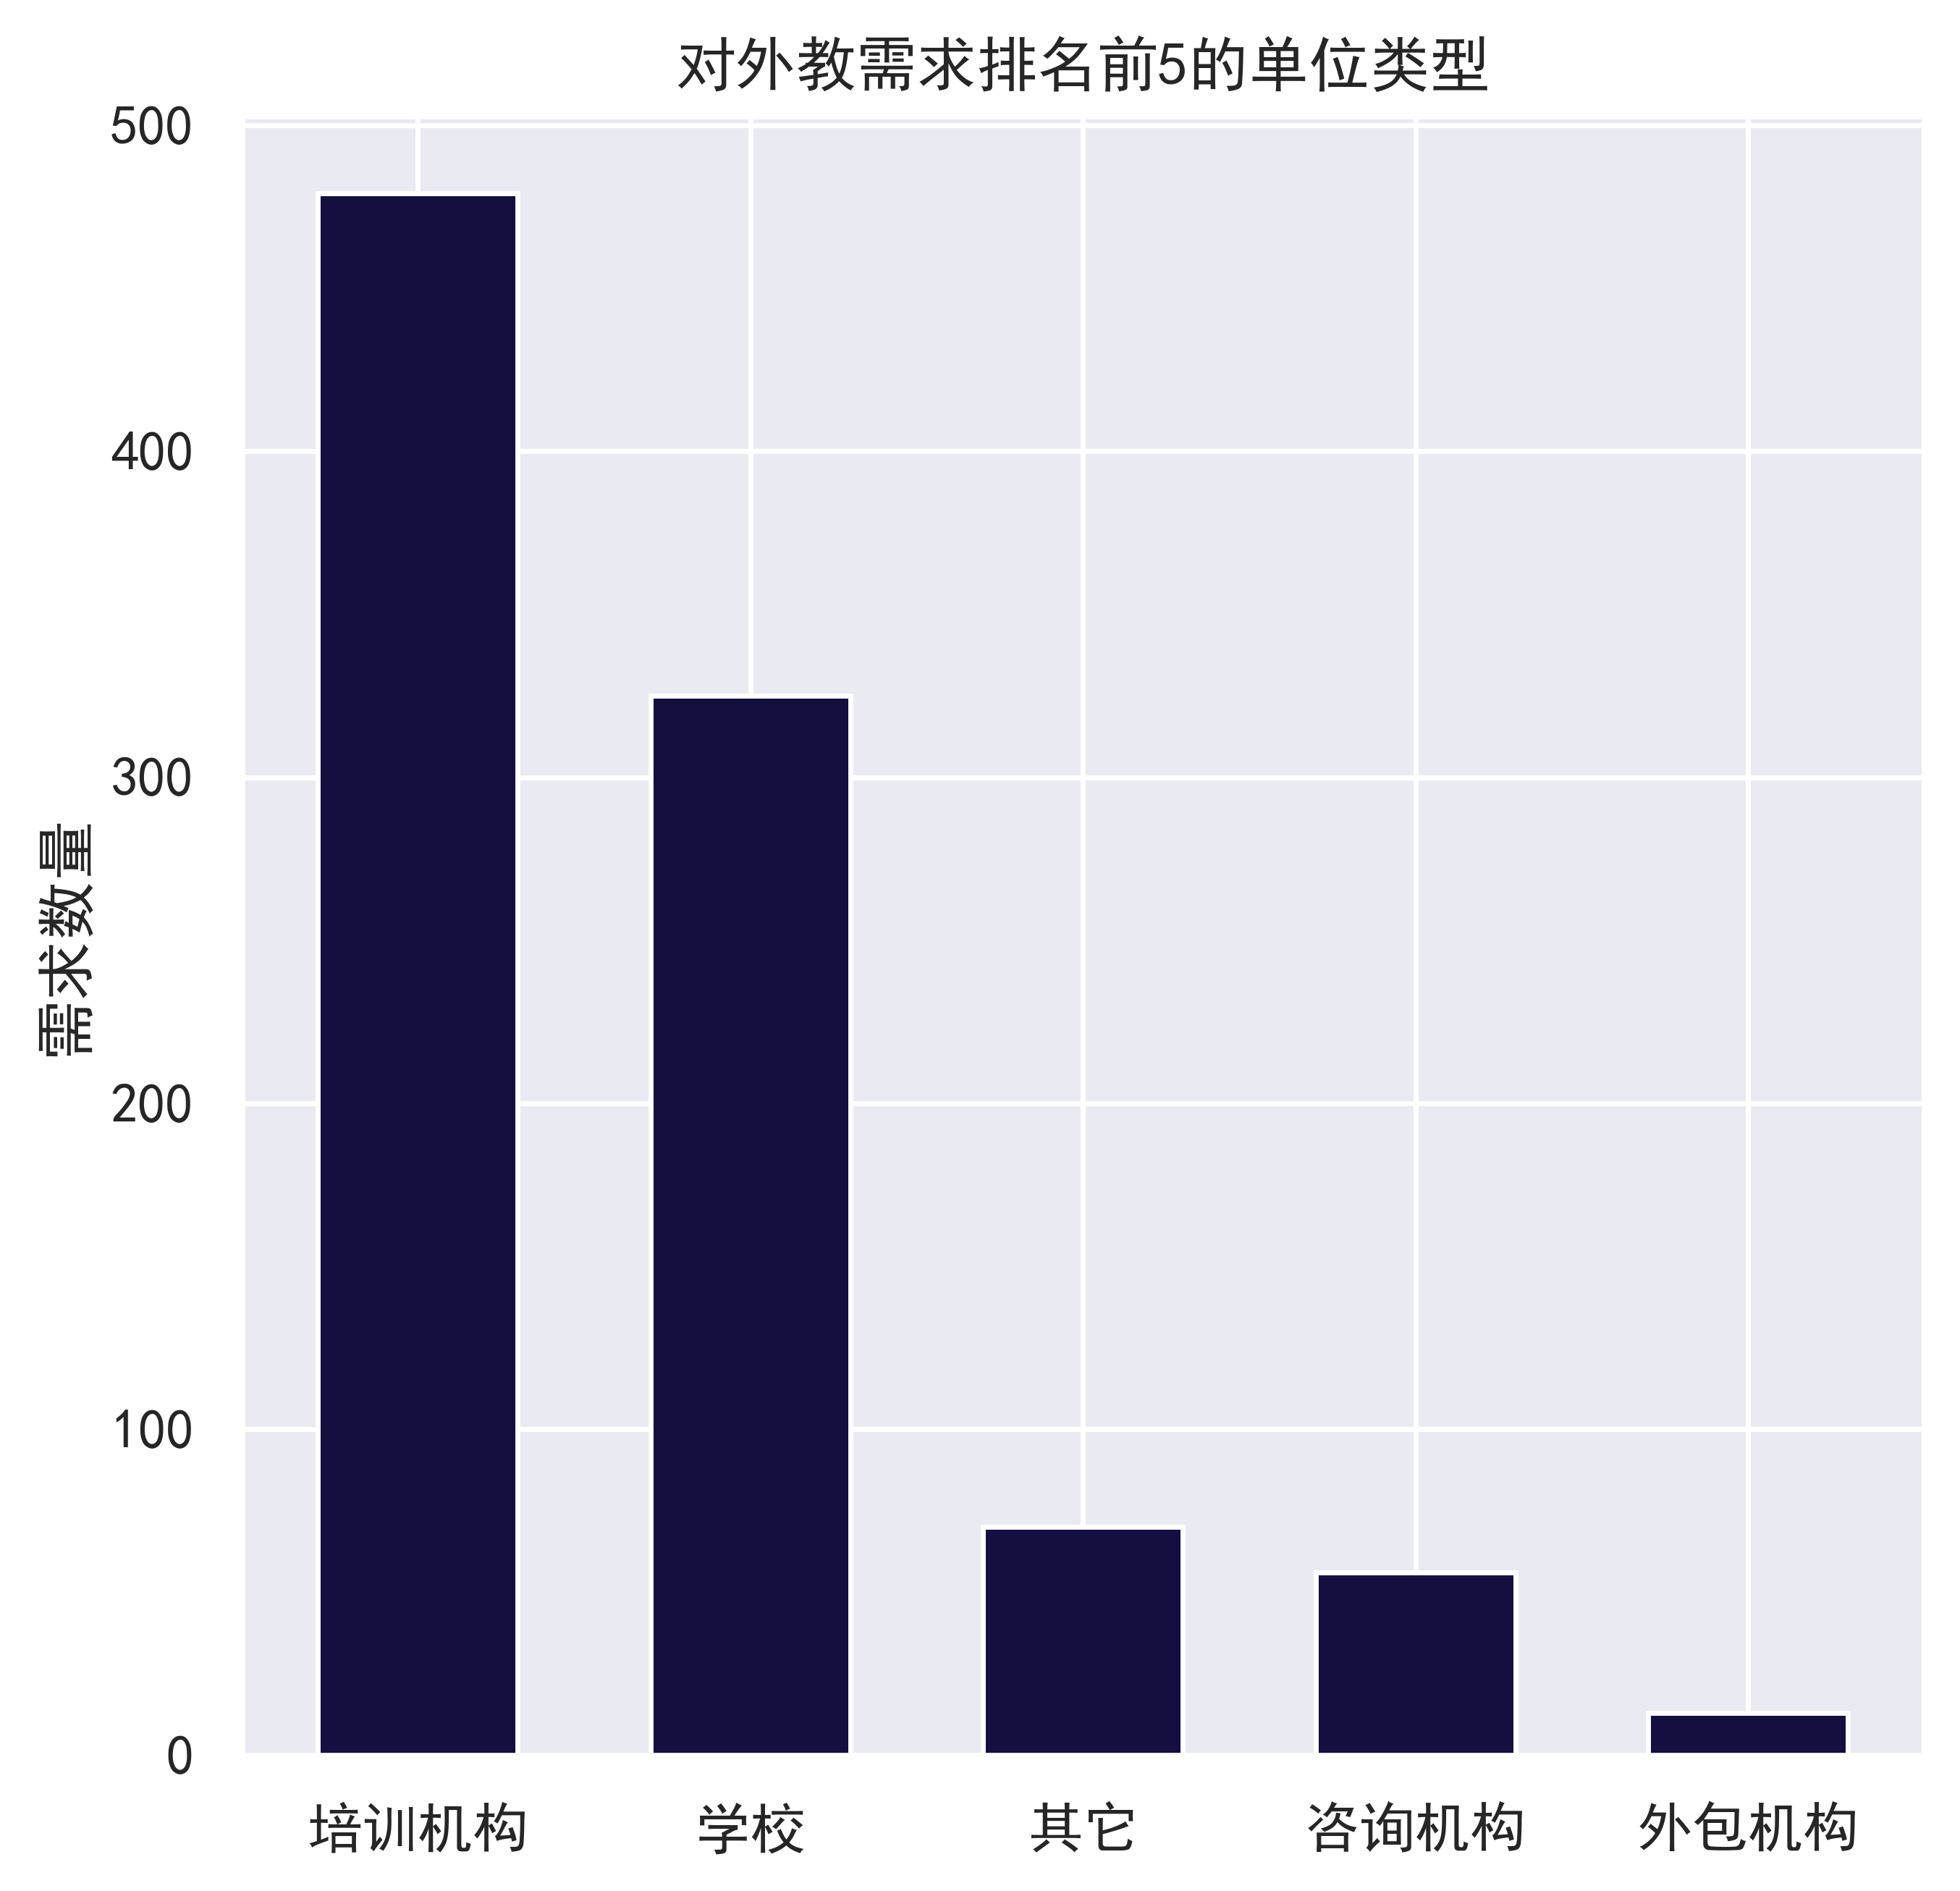

In [271]:
sns.set(font='SimHei',font_scale=1)  # 每次要针对画的图调整字体大小
ind = np.arange(5)  # x轴的刻度位置
width = 0.6  # 柱子的宽度
fig, ax = plt.subplots()
rects1 = ax.bar(ind, com_type_demand.values, width, color='#130f40', label='外教')
ax.set_ylabel('需求数量')
ax.set_title('对外教需求排名前5的单位类型')
plt.xticks(ind,['培训机构', '学校',  '其它','咨询机构', '外包机构'])

plt.show()

* 看看对外教需求前五的单位类型，发现大部分都是培训机构发布的职位

In [268]:
salary_com_type = np.round(data_jlc.groupby('com_type')['salary_clean'].mean()[com_type_demand.index], 1)

In [269]:
salary_com_type

Teaching Center            14560.9
School                     18599.7
Others                     17742.9
Consultancy/Legal/Admin    18635.4
Outsourcing                15634.6
Name: salary_clean, dtype: float64

In [270]:
bar = Bar("对外教需求排名前5的单位类型的外教平均工资", width = 700,height=500)

bar.add("", ['培训机构', '学校',  '其它','咨询机构', '外包机构'], 
        salary_com_type.values,  xaxis_label_textsize=18, yaxis_label_textsize=20, 
        is_label_show=True, label_color = ['#130f40'])
bar.render('对外教需求排名前5的单位类型的外教平均工资.html')

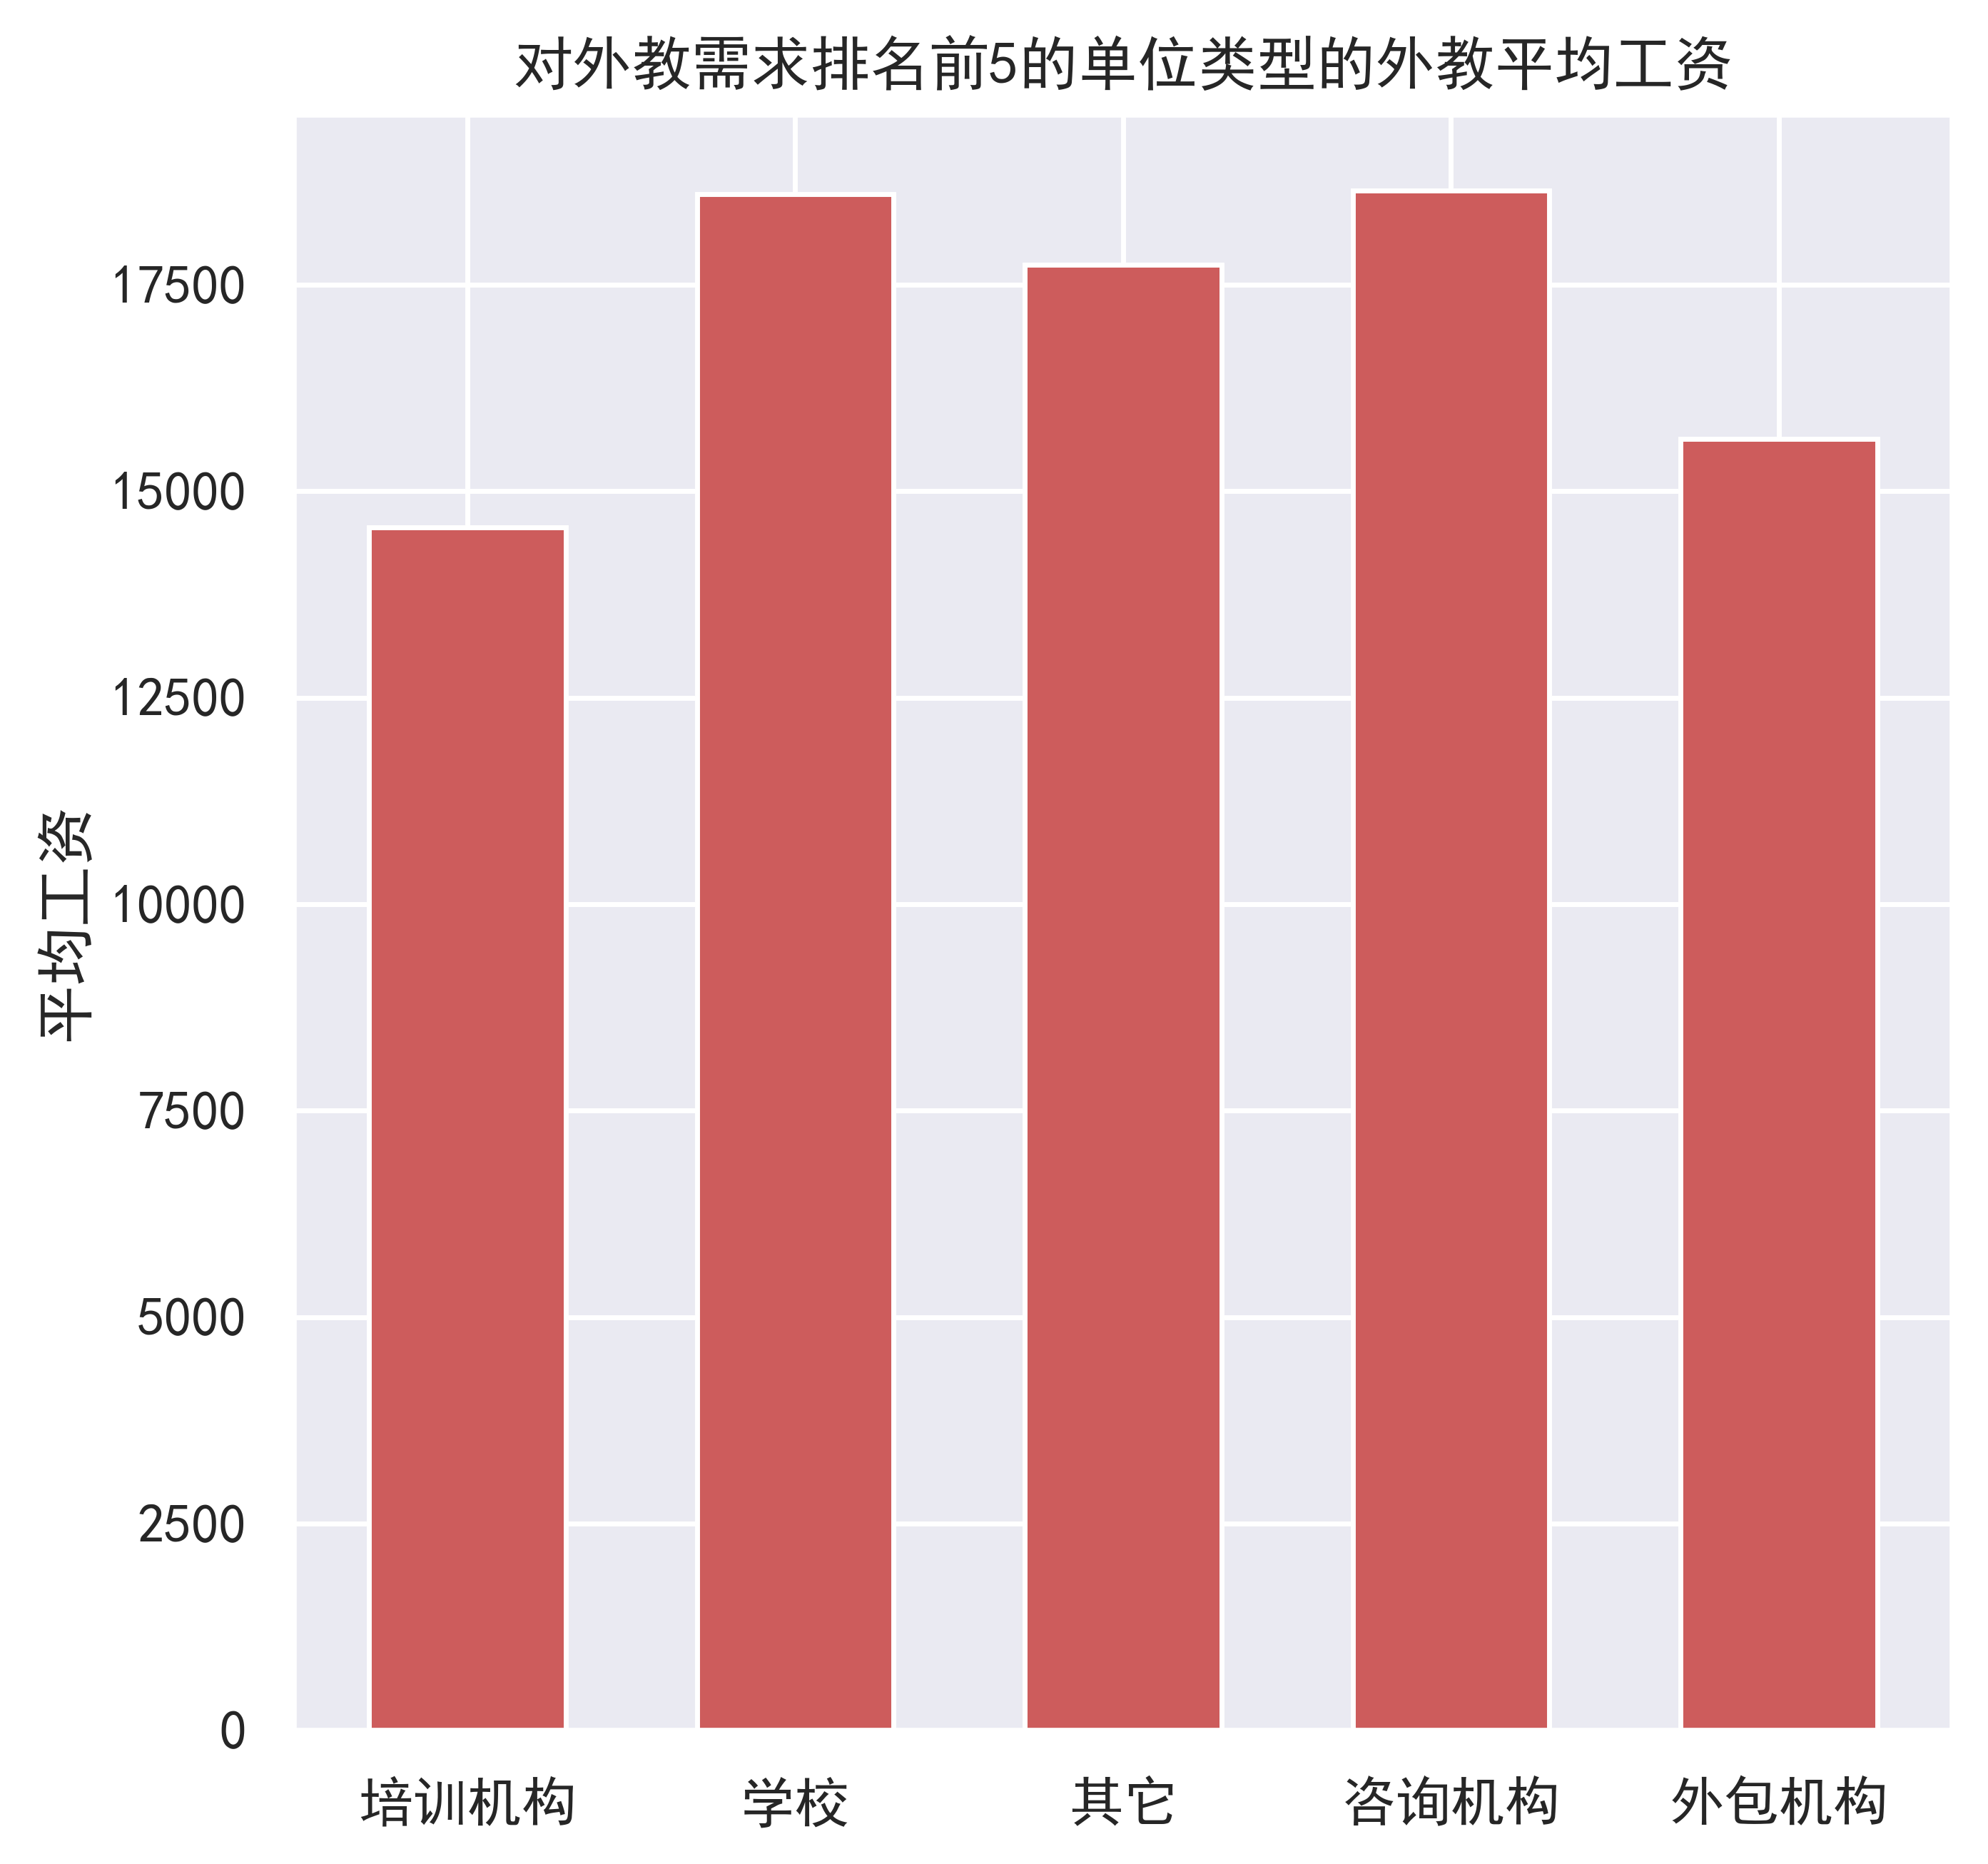

In [273]:
sns.set(font='SimHei',font_scale=1)  # 每次要针对画的图调整字体大小
ind = np.arange(5)  # x轴的刻度位置
width = 0.6  # 柱子的宽度
fig, ax = plt.subplots()
rects1 = ax.bar(ind, salary_com_type.values, width, color='IndianRed', label='外教')
ax.set_ylabel('平均工资')
ax.set_title('对外教需求排名前5的单位类型的外教平均工资')
plt.xticks(ind,['培训机构', '学校',  '其它','咨询机构', '外包机构'])

plt.show()

*  学校给的平均工资是最高的，达18599.7，这里面很多都是价格昂贵的国际语言学校，对教师的学历和资质要求相对高一些。
* 而培训机构给的工资却是最低的，对外教的学历和资质要求都比较宽松。

In [138]:
company = data_jlc['company'].value_counts().nlargest(50)

In [142]:
from pyecharts import WordCloud

wordcloud = WordCloud(width=1000, height=600)
wordcloud.add("", company.index, company.values, word_size_range=[20, 100])
wordcloud.render('公司名称的词云.html')

* 词云这个没法用matplotoib做，所以就不在这里显示了

## 4.总结
我们逐一回答开始提出的问题：
1. 外教的中国老师的工资差的别如何？
   * 中教的工资集中分布在五千到一万多一点，外教的工资分布在一万出头到两万出头
   * 外教的工资总体均值为16348.3元，中教的工资总体均值为7777.7元，外教是中教的2倍多
2. 市场对外教的经验和学历需求如何？
   * 相似的经验水平下，外教的平均工资大概是中教的2倍左右
   * 相似的学历水平下，外教的平均工资大概是中教的2倍左右
   * 对外教经验需求比例：对Entry Level/入门级的需求比例最大，达到了45.7%，总体来说对相对年轻、有些许经验的外教需求量大(超过九成)
   * 对外教学历需求比例：对Bachelor/本科以上的需求比例最大，达到了74.8%，加上学历不限的23.5%，已经达到了98%
3. 哪些城市对外教的需求多？
   * 北京以441个职位遥遥领先
   * 北上广深杭占据前五，其余也都是知名大城市
   * 在对外教需求最多的10个城市中，外教的平均薪酬都在中教的2倍左右
4. 哪些类型的机构在招聘外教？
   * 对外教需求前五的单位类型中，排第一的是培训机构
   *　学校给的平均工资是最高的，达18599.7，这里面很多都是价格昂贵的国际语言学校，对教师的学历和资质要求相对高一些。
   * 而培训机构给的工资却是最低的，对外教的学历和资质要求都比较宽松。

究其原因，价格跟稀缺性成正比，外教在国内供不应求，一是现在学生或者学生家长对于英语口语的需求越来越高，二是很多外国人才开始认识中国。

当越来越多的外国人了解我们国家并且愿意来当外教的时候，供不应求的状况便会产生变化。